# Setting up Necessary Modules

In [ ]:
''' Installing some prerequisites'''
!pip install interpolation
epsilon_0 = 0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2


In [ ]:
''' Importing necessary packages'''
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
plt.rcParams['figure.facecolor'] = 'white'

params__ = {'legend.fontsize': 25,
         'axes.labelsize': 32,
         'axes.titlesize':32,
         'xtick.labelsize':32,
         'ytick.labelsize':32}

plt.rcParams.update(params__)

import numpy as np
from interpolation import interp
from numba import njit, float64
from numba.experimental import jitclass
import scipy.interpolate as intrp
from scipy.stats import norm
from collections import OrderedDict
from collections import Counter
from collections import defaultdict
import matplotlib.pylab as pl
import matplotlib as mpl
import random
import pandas as pd
import math
from scipy.stats import entropy
from scipy.stats import bernoulli
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate
exp_seed = 20
exp_seed = 29
np.random.seed(exp_seed)


In [ ]:
T=60

# The Data and Data Functions

In [ ]:
# Setup

pl.rcParams.update({'font.size': 32})

'''various classifiers and income/savings percentiles'''
# Setting up the necessary income information
inc_perc_2019 =  [0, 610.12, 4067.48, 7118.1, 9151.84, 10168.71, 11185.58, 12308.21, 13592.52, 14849.37, 15912, 17143.43, 18303.68, 19341.91, 20337.42, 21386.83, 22585.73, 24021.55, 25197.05, 25986.14, 27292.82, 28472.39, 29710.94, 30510.2, 31727.4, 32844.94, 34237.04, 35590.49, 36511.78, 37624.23, 38702.12, 40381.99, 41062.27, 42664.86, 43766.13, 45351.44, 46320.52, 47792.94, 49114.88, 50843.56, 51120.15, 52674.94, 53953.15, 55816.06, 56944.79, 58404, 59995.4, 61027.52, 62557.91, 64093.39, 65953.25, 67225.35, 69039.45, 70736.61, 71992.44, 73744.51, 75899.26, 77109.34, 78874.63, 80867.7, 82366.56, 84420.64, 86474.72, 88471.86, 90961.16, 92536.29, 94841.54, 97184.41, 99805.9, 101891.51, 104403.18, 106873.16, 109407.2, 112059.2, 114916.61, 118074, 121705.24, 124363.34, 128125.77, 132193.25, 135856.02, 140328.22, 144539.08, 149581.75, 153673.64, 159080.34, 165244.62, 171851.23, 178813.74, 187307.67, 197314.7, 207041.07, 219817.04, 235075.19, 252493.18, 276588.96, 310655.16, 365232.67, 483131.76]
prctng= [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
interp_=intrp.interp1d(prctng,inc_perc_2019,fill_value="extrapolate")
values_=interp_(np.random.random(size=10000))
incomes = values_ /(12000.0)
inc_10 = (np.percentile(incomes, 10))
inc_20 = (np.percentile(incomes, 20))
inc_30= (np.percentile(incomes, 30))
inc_40 =(np.percentile(incomes, 40))
inc_50 =(np.percentile(incomes, 50))
inc_60 = (np.percentile(incomes, 60))
inc_70 =(np.percentile(incomes, 70))
inc_80 =(np.percentile(incomes, 80))
inc_90= (np.percentile(incomes, 90))
inc_99 =(np.percentile(incomes, 99))

inc_10_sum=[]
inc_20_sum=[]
inc_30_sum=[]
inc_40_sum=[]
inc_50_sum=[]
inc_60_sum=[]
inc_70_sum=[]
inc_80_sum=[]
inc_90_sum=[]
inc_99_sum=[]
inc_99_more = []

for k in incomes:
        if k < inc_10:
            inc_10_sum.append(k)

        if k >= inc_10 and k < inc_20:
            inc_20_sum.append(k)

        if  k >= inc_20 and k < inc_30:
            inc_30_sum.append(k)

        if k >= inc_30 and k < inc_40:
            inc_40_sum.append(k)

        if k >= inc_40 and k < inc_50:
            inc_50_sum.append(k)

        if k >= inc_50 and k < inc_60:
            inc_60_sum.append(k)

        if k >= inc_60 and k < inc_70:
            inc_70_sum.append(k)

        if k >= inc_70 and k < inc_80:
            inc_80_sum.append(k)

        if k >= inc_80 and k < inc_90:
            inc_90_sum.append(k)

        if k >= inc_90 and k < inc_99 :
            inc_99_sum.append(k)

        if k >= inc_99:
            inc_99_more.append(k)


inc_10_avg = np.mean(inc_10_sum)
inc_20_avg = np.mean(inc_20_sum)
inc_30_avg = np.mean(inc_30_sum)
inc_40_avg = np.mean(inc_40_sum)
inc_50_avg = np.mean(inc_50_sum)
inc_60_avg = np.mean(inc_60_sum)
inc_70_avg = np.mean(inc_70_sum)
inc_80_avg = np.mean(inc_80_sum)
inc_90_avg = np.mean(inc_90_sum)
inc_99_avg = np.mean(inc_99_sum)
inc_99_avg_more = np.mean(inc_99_more)

#Setting up savings information
saving_val = [-94516.52, -54867.26, -35734.82,
              -25936.24, -18386.58, -11926.06, -7469.49, -3835.64,
              -1832.38, -466.58, 3.43, 178.2, 502.44, 860.92, 1577.19,
              2592.8, 3452.04, 4480.43, 5378.37, 6368.35, 7363.47, 8511.79, 9689.16,
              10777.34, 12430.11, 14197.79, 16060.99, 18106.62, 20340.88, 23695.62, 27250.07,
              30994.35, 36382.96, 40616.62, 45081.82, 50409.19, 55408.58, 59543.95, 63103.9, 67469.07,
              71802.48, 75801.39, 80406.68, 84408.2, 89548.35, 94983.2, 100589.66, 106335.51, 114194.83,
              121411.37, 127446.43, 134207.73, 141621.65, 150028.88, 158430.46, 167469.68, 174943.76, 182100.06,
              191929.7, 201311.36, 211096.7, 219405.74, 228563.2, 238313.46, 249137.43, 260147.01, 271875.08,
              288498.14, 301999.85, 314920.61, 328617.37, 349362.49, 365919.18, 382911.64, 403283.56, 428623.03,
              455610.73, 485176.88, 523925.5, 558189.68, 591350.95, 637050.12, 681782.41, 737122.98, 795218.85, 854908.75,
              928665.81, 991188.75, 1085969.92, 1219126.46, 1355268.26, 1541905.98, 1767510.16, 2080569.86, 2584130.26, 3294388.49, 4640603.15, 6557022.79, 11099166.07]
savings_prctng= [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
interp_s=intrp.interp1d(savings_prctng,saving_val,fill_value="extrapolate")
savings_s=interp_s(np.random.random(size=10000))/1000
savings_10 = (np.percentile(savings_s, 10))
savings_20 = (np.percentile(savings_s, 20))
savings_30= (np.percentile(savings_s, 30))
savings_40 =(np.percentile(savings_s, 40))
savings_50 =(np.percentile(savings_s, 50))
savings_60 = (np.percentile(savings_s, 60))
savings_70 =(np.percentile(savings_s, 70))
savings_80 =(np.percentile(savings_s, 80))
savings_90= (np.percentile(savings_s, 90))
savings_99 =(np.percentile(savings_s, 99))
savings_values = [savings_10,savings_20,savings_30,savings_40,savings_50,savings_60,savings_70,savings_80,savings_90,savings_99, 1000000]

'''the basic expenditures are deined by the income percentiles 20th, 40th, etc. based on the labor statistic data and the monthly ean average expenditures '''
def basic_expenditure(income):
    basic_needs = 0
    if income <= inc_10:
        basic_needs = 25856/12
    if income > inc_10 and income <= inc_20:
        basic_needs = 31499/12
    if income > inc_20 and income<= inc_30:
        basic_needs = 37131/12
    if income > inc_30 and income <= inc_40:
        basic_needs = 43822/12
    if income > inc_40 and income <=inc_50:
        basic_needs = 49367/12
    if income > inc_50 and income <=inc_60:
        basic_needs = 56720/12
    if income > inc_60 and income <=inc_70:
        basic_needs = 66435/12
    if income > inc_70 and income <=inc_80:
        basic_needs = 75945/12
    if income >inc_80 and income <=inc_90:
        basic_needs = 96913/12
    if income >inc_90:
        basic_needs = 145967/12
    #basic_needs = 5000
    return basic_needs/1000

clf_threshold_Q5 = int(np.quantile(incomes,0.50))

In [ ]:
''' Initial setup for precarity calculation and learning '''
stateseq = [0,1,2,3,4,5,6,7,8,9]
Incomes = (inc_10_avg,inc_20_avg,inc_30_avg,inc_40_avg,inc_50_avg,inc_60_avg,inc_70_avg,inc_80_avg,inc_90_avg,inc_99_avg, inc_99_avg_more)
Savings = [savings_10,savings_20,savings_30,savings_40,savings_50,savings_60,savings_70,savings_80,savings_90,savings_99]

In [ ]:
''' Income states based on original data '''
def getIncomeState (income):
            if income<inc_10:
                return (0)
            if income>=inc_10 and income<inc_20:
                return (1)
            if income>=inc_20 and income<inc_30:
                return (2)
            if income>=inc_30 and income<inc_40:
                return (3)
            if income>=inc_40 and income<inc_50:
                return (4)
            if income>=inc_50 and income<inc_60:
                return (5)
            if income>=inc_60 and income<inc_70:
                return (6)
            if income>=inc_70 and income<inc_80:
                return (7)
            if income>=inc_80 and income<inc_90:
                return (8)
            if income>=inc_90 and income<inc_99:
                return (9)
            if income>=inc_99:
                return (10)

In [ ]:
#Calculate savings based on income
def get_savings(income):
    if income < np.percentile(incomes, 20):

        return  (9.30)
    if np.percentile(incomes, 20)<=income and income< np.percentile(incomes, 40):
        return (43.80)

    if np.percentile(incomes, 40) <=income and income< np.percentile(incomes, 60):
        return (95.62)

    if np.percentile(incomes, 60) <=income and income< np.percentile(incomes, 80) :
        return (205.20)

    if np.percentile(incomes, 80)  <=income and income< np.percentile(incomes, 90) :
        return (387.85)

    if income>=np.percentile(incomes, 90):
        return  (1589.30)

#Get the state
def getState(indiv_savings_status):
  savings_class = []
  for idx in range(len(indiv_savings_status)):
        if indiv_savings_status[idx] <savings_10:
            savings_class.append(0)
        if indiv_savings_status[idx]>=savings_10 and indiv_savings_status[idx]<savings_20:
            savings_class.append(1)
        if indiv_savings_status[idx]>=savings_20 and indiv_savings_status[idx]<savings_30:
            savings_class.append(2)
        if indiv_savings_status[idx]>=savings_30 and indiv_savings_status[idx]<savings_40:
            savings_class.append(3)
        if indiv_savings_status[idx]>=savings_40 and indiv_savings_status[idx]<savings_50:
            savings_class.append(4)
        if indiv_savings_status[idx]>=savings_50 and indiv_savings_status[idx]<savings_60:
            savings_class.append(5)
        if indiv_savings_status[idx]>=savings_60 and indiv_savings_status[idx]<savings_70:
            savings_class.append(6)
        if indiv_savings_status[idx]>=savings_70 and indiv_savings_status[idx]<savings_80:
            savings_class.append(7)
        if indiv_savings_status[idx]>=savings_80 and indiv_savings_status[idx]<savings_90:
            savings_class.append(8)
        if indiv_savings_status[idx]>=savings_90 and indiv_savings_status[idx]<savings_99:
            savings_class.append(9)
        if indiv_savings_status[idx]>=savings_99:
            savings_class.append(10)
  return savings_class

def getIncomeClass(income):
        if income<inc_10:
            return (0)
        if income>=inc_10 and income<inc_20:
            return (1)
        if income>=inc_20 and income<inc_30:
            return (2)
        if income>=inc_30 and income<inc_40:
            return (3)
        if income>=inc_40 and income<inc_50:
            return (4)
        if income>=inc_50 and income<inc_60:
            return (5)
        if income>=inc_60 and income<inc_70:
            return (6)
        if income>=inc_70 and income<inc_80:
            return (7)
        if income>=inc_80 and income<inc_90:
            return (8)
        if income>=inc_90 and income<inc_99:
            return (9)
        if income>=inc_99:
            return (10)

# Consumption Model

In [ ]:
con_model_data = [
    ('γ', float64),              # utility parameter
    ('β', float64),              # discount factor
    ('Rt',float64),
    ('P',float64),
    ('s_grid', float64[:])      # Grid over savings
]

In [ ]:
@jitclass(con_model_data)
class ConsumptionModel:
    """
    Consumption model details and support functions
    """

    def __init__(self,
                 #γ=0.5,
                 #β=0.05*(2-0.5),
                 #Rt = 1.05,
                 γ=1.5,
                 β=0.90,#0.05*(2+0.5),
                 Rt = 1.10,
                 P = -10.0,
                 shock_draw_size=50,
                 grid_max=500,
                 grid_size=10000,
                 seed=1234):

        np.random.seed(seed)  # arbitrary seed

        self.γ, self.β = γ, β
        self.P = P
        self.s_grid = np.linspace(0, grid_max, grid_size)

        # Test stability assuming {R_t} is IID and adopts the lognormal
        # specification given below.  The test is then β E R_t < 1.
        self.Rt = Rt
        assert β * self.Rt < 1, "Stability condition failed."


    def R(self):
        return self.Rt

    '''get_incomes returns the array of expected incomes for each person, in an internal function'''
    def get_incomes(self):
      return np.array(Incomes)

    '''Generate the polynomial for the consumption function equation (positive degree)'''
    def generate_polynomial(self,y,x):
        n = np.ceil((self.γ*(self.Rt-1))/(self.Rt-1-(self.β/2)))
        p = [0.0 for i in range(n+1)]
        c = ((self.γ/(1-self.γ))*(1/(self.β*self.P)))**(1/(self.γ-1))#((self.γ/(1-self.γ))*(1/(self.β*self.P)))**(1/(self.γ-1))
        k = -1*((self.γ*(self.Rt-1))/(self.β/2+(self.γ-1)*(self.Rt-1)))*(c**(1-((self.γ*self.Rt)/(self.Rt-1-self.β/2))))
        k = 0#(((self.Rt-self.β))**(-1*n))*(-1)*((self.γ*(self.Rt-1))/((self.γ-1)*self.Rt+self.β))*(c**(1-n))
        p[0] = k#*((self.Rt-self.β))**n
        p[-2] = ((self.γ*(self.Rt))/((self.γ-1)*(self.Rt-1)+(self.β/2)))
        p[-1] = -1*(x+y/self.Rt)
        return p

    '''Generate the polynomial for the consumption function equation (negative degree)'''
    def generate_polynomial_neg(self,y,x,tol=1e-15):
        n = 1+round((self.γ*(self.Rt-1))/(1+(self.β/2)-self.Rt)+tol)#np.ceil((self.γ*self.Rt)/(1+self.β-self.Rt))
        p = [0.0 for i in range(n+1)]
        c = ((self.γ/(1-self.γ))*(1/(self.β*self.P)))**(1/(self.γ-1))#((self.γ/(1-self.γ))*(1/(self.β*self.P)))**(1/(self.γ-1))
        k = -1*((self.γ*(self.Rt-1))/(self.β/2+(self.γ-1)*(self.Rt-1)))*(c**(1-((self.γ*self.Rt)/(self.Rt-1-self.β/2))))
        p[-1] = k
        p[0] = ((self.γ*(self.Rt))/((self.γ-1)*(self.Rt-1)+(self.β/2)))
        p[1] = -1*(x+y/self.Rt)
        return p





In [ ]:
'''Calculate consumption value'''
def get_consumption(y,x,p,tol=1e-15, min_con = True):
      min_c = 0
      if(min_con):
        min_c = basic_expenditure(y)
      roots = np.roots(p)
      real_valued = roots.real[abs(roots.imag)<tol]
      admissible = real_valued
      admissible = admissible[admissible>=0]
      if(admissible.size==0):
        return min_c
      return max(np.real(np.amax(admissible)),min_c) #Caculate admissible consumption and select max of it or basic needs value

In [ ]:
def K(a_in, σ_in, con_model):
    """
    Using the endogenous grid method.

        * con_model is an instance of ConsumptionModel
        * a_in[i, z] is an asset grid
        * σ_in[i, z] is consumption at a_in[i, z]
    """

    # Simplify names
    R, β = con_model.R, con_model.β
    s_grid= con_model.s_grid
    get_incomes = con_model.get_incomes
    n = get_incomes().size
    generate_polynomial_neg = con_model.generate_polynomial_neg
    generate_polynomial = con_model.generate_polynomial

    #print(n)
    # Create consumption function by linear interpolation
    σ = lambda a, z: interp(a_in[:,z], σ_in[:,z], a)

    # Allocate memory
    σ_out = np.empty_like(σ_in)

    # Obtain c_i at each s_i, z, store in σ_out[i, z], computing
    for i, s in enumerate(s_grid):
        for y in range(n):
            R_hat = R()
            Y_hat = get_incomes()[y]
            C = get_consumption(Y_hat,s,generate_polynomial_neg(Y_hat,s)) #Calculate consumption given current assets and income
            #C = get_consumption(Y_hat,s,generate_polynomial(Y_hat,s))
            #C = np.real(np.roots(generate_polynomial_neg(Y_hat,s))[0])
            #C = np.real(np.roots(generate_polynomial(Y_hat,s))[0])
            σ_out[i, y] = C

    # Calculate endogenous asset grid
    a_out = np.empty_like(σ_out)
    for z in range(n):
        a_out[:, z] = s_grid + σ_out[:, z]

    # Fixing a consumption-asset pair at (0, 0) improves interpolation
    σ_out[0, :] = 0
    a_out[0, :] = 0

    return a_out, σ_out

In [ ]:
def solve_model_time_iter(model,        # Class with model information
                          a_vec,        # Initial condition for assets
                          σ_vec):

    a_new, σ_new = K(a_vec, σ_vec, model)
    return a_new, σ_new

In [ ]:
con_model = ConsumptionModel()

In [ ]:
# Initial guess of σ = consume all assets
k = len(con_model.s_grid)
n = (con_model.get_incomes()).size
σ_init = np.empty((k, n))
for z in range(n):
    σ_init[:, z] = con_model.s_grid
a_init = np.copy(σ_init)

In [ ]:
a_star, σ_star = solve_model_time_iter(con_model, a_init, σ_init) #Solution for the optimal path. The convergence is in quick since we find the exact solution.

# Precarity Quantification

In [ ]:
'''precarity quantification'''
def getEntropy(sequence):
  value,counts = np.unique(sequence, return_counts=True)
  return entropy(counts, base=2)

def generateWeight(sequence,values, states):
  weights = []
  for i in range(1,len(sequence)):
    m = states.index(sequence[i])
    n = states.index(sequence[i-1])
    weights.append(math.exp((1e-22)*abs(values[m]-values[n])))
  return weights

def complexity(sequence, stateSpace):
  na = len(stateSpace)
  ls= len(sequence)
  currentState = sequence[0]
  nts = 0
  for i in range(len(sequence)):
    if(sequence[i]!=currentState):
      nts += 1
      currentState = sequence[i]
  return math.sqrt((getEntropy(sequence)/math.log2(na))*(nts/(ls-1)))

def getWellBeing(income):
  if(income <= 25000/12000):
    return 1/0.55
  elif(income<= 50000/12000):
    return 1/0.67
  elif(income<= 100000/12000):
    return 1/0.85
  else:
    return 1/0.96

def precarityQuantification(sequence, stateSpace, weights, lambdav, alpha, beta, init_state, windowSize = -1, useInit = False, useIncome = False, income = 0):
  n = len(sequence)
  st = 0
  if(windowSize!=-1):
    st = n - windowSize
  if(st<0):
    st = 0
  if(st == 0 and useInit == True):
    startState = init_state
  else:
    startState = sequence[st]
  currentState = sequence[st]
  negativeWts = 0
  positiveWts = 0
  for i in range(st+1,len(sequence)):
    if (sequence[i]>=currentState):
      positiveWts += weights[i-1]
    else:
      negativeWts += weights[i-1]
    currentState = sequence[i]
  totalWts = sum(weights[st:])
  Qs = 0
  if (totalWts!=0):
    negativeQs = negativeWts/totalWts
    positiveQs = positiveWts/totalWts
    Qs = negativeQs - positiveQs
  else:
    print(negativeWts,positiveWts)
  if(useIncome):
    init_cost = (1+len(stateSpace)-startState)*getWellBeing(income)
  else:
    init_cost = (1+len(stateSpace)-startState)
  return lambdav*init_cost+(1-lambdav)*math.pow(complexity(sequence,stateSpace),alpha)*math.pow(1+Qs,beta)

In [ ]:
''' Given assets and assets levels convert the assets to a state sequence'''
def get_sequence(a,assets_lvls,asset_states):
  sequence = []
  n = len(assets_lvls)
  for a_ in a:
    for i in range(n):
      if(a_ <= assets_lvls[i]):
        sequence.append(i)
        break
  return sequence

# Minor Income Difference Scenario

## Creating a decision maker

In [ ]:
np.random.seed(exp_seed)
def getLabel(income):
  if(income <= 25000/12000):
    return 0#bernoulli.rvs(0.55-0.25)
  elif(income<= 50000/12000):
    return bernoulli.rvs(0.67-0.25)
  elif(income<= 100000/12000):
    return bernoulli.rvs(0.85-0.25)
  else:
    return 1#bernoulli.rvs(0.96-0.25)

def generateData(incomes, sample_size):
  income_sample = np.random.choice(incomes,sample_size,False)
  savings_sample = np.array([get_savings(income) for income in income_sample])
  label_sample = np.array([getLabel(income) for income in income_sample])
  features = np.array([savings_sample, income_sample]).T
  return features, label_sample.T

def getClassifier(features, labels):
  # model_1 = LogisticRegression()
  # model_2 = GradientBoostingClassifier()
  # model_3 = XGBClassifier()
  # model_4 = RandomForestClassifier()
  # the final model using voting
  # clf = VotingClassifier(estimators=[('lr', model_1), ('xgb', model_2)], voting='soft')

  clf = GradientBoostingClassifier()




  # training all the model on the train dataset
  # clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))
  clf.fit(features, labels)
  return clf

def getClassifierLogistic(features, labels):
  logreg_clf = LogisticRegression()
  logreg_clf.fit(features, labels)
  return logreg_clf

In [ ]:
features, labels = generateData(incomes, 10000)
clf_real = getClassifier(features, labels)
clf_logistic = getClassifierLogistic(features, labels)

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

clf_cross_gbc = cross_validate(GradientBoostingClassifier(), features, labels, cv=kf)
print (clf_cross_gbc)

clf_cross_lgr = cross_validate(LogisticRegression(), features, labels, cv=kf)
print (clf_cross_lgr)





print ("=======cv score summaries for various classifiers=======")
scores = cross_val_score(AdaBoostClassifier(), features, labels, cv = kf)


print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



scores = cross_val_score(GradientBoostingClassifier(), features, labels, cv = kf)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


scores = cross_val_score(LogisticRegression(), features, labels, cv = kf)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

{'fit_time': array([0.99605608, 0.63538074, 0.6227746 , 0.62880993, 0.88283801,
       1.01497173, 1.00320387, 0.69170117, 0.62558818, 0.61649776]), 'score_time': array([0.00321245, 0.00298333, 0.00301933, 0.00286674, 0.00390315,
       0.00398159, 0.00375724, 0.00291181, 0.00291371, 0.00305772]), 'test_score': array([0.796, 0.797, 0.789, 0.778, 0.79 , 0.803, 0.769, 0.804, 0.798,
       0.791])}
{'fit_time': array([0.03524804, 0.03615332, 0.03630209, 0.04084277, 0.03744888,
       0.04107904, 0.03467464, 0.03687549, 0.03782439, 0.03398156]), 'score_time': array([0.00140882, 0.00145483, 0.0013895 , 0.00138879, 0.00141454,
       0.00139332, 0.00172472, 0.00145578, 0.00145793, 0.0014596 ]), 'test_score': array([0.782, 0.805, 0.791, 0.787, 0.802, 0.76 , 0.782, 0.787, 0.807,
       0.78 ])}
=======cv score summaries for various classifiers=======
Cross Validation Scores:  [0.813 0.807 0.79  0.789 0.784 0.792 0.804 0.784 0.781 0.797]
Average CV Score:  0.7941
Number of CV Scores used in Ave

In [ ]:
def getDecisionBoundary(clf):
  w = clf.coef_[0]
  b = -1*clf.intercept_[0]/w[1]
  m = -1*w[0]/w[1]
  return m,b

def getIncome(clf,savings,epsilon = 0.1):
  m,b = getDecisionBoundary(clf)
  income = m*savings+b
  return (1+epsilon)*income

## Getting the consumption

In [ ]:
''' Compute assets when the income changes at intervals based on temporary and permanent shocks.
There is a decision maker and depnding on where the Agent is compared to the decision maker,
a shock could be either positive or negative.'''
def compute_asset_series_static_clf(con_model, a_star, σ_star, z_init, clf, initincome=0, T=500_000, init_a = 0, permanenet_shock_gap = 500_000, temporary_shock_gap = 500_000, permanenet_shock = 0, temporary_shock = 0):
    # Create consumption function by linear interpolation
    σ = lambda a, z : interp(a_star[:, z], σ_star[:, z], a)
    t_s = []
    # Simulate the asset path
    a = np.zeros(T+1)
    a[0] = init_a
    y_val = [initincome]
    current_income = initincome
    lbls = []
    for t in range(T):
        label = clf.predict(np.array([[a[t],current_income]]))[0]
        lbls.append(label)
        if (((t+1)%permanenet_shock_gap == 0) and label == 0):
          current_income *= (1-permanenet_shock) #permanent shocks with negative decisions
        elif (((t+1)%permanenet_shock_gap == 0) and label == 1):
          current_income *= (1+permanenet_shock) #permanent shocks with positive decisions
        y_tmp = current_income
        if (((t+1)%temporary_shock_gap == 0) and label == 0):
          current_income *= (1-temporary_shock) #temporary shocks with negative decisions
        elif (((t+1)%temporary_shock_gap== 0) and label == 1):
          current_income *= (1+temporary_shock) #temporary shocks with positive decisions
        R = con_model.R()
        z = getIncomeState(current_income)
        s = a[t] - max(σ(a[t], z),basic_expenditure(y_tmp)) #Calculating the consumption and consuming the maximum of it or the basic needs
        a[t+1] = R * (s) + current_income
        y_val.append(current_income)
        if ((t+1)%temporary_shock_gap == 0):
          current_income = y_tmp
        if(a[t+1]<=0): #Make sure we don't keep going bankrupt
          break
    return a, y_val

## Running Experiments: Minor Income Difference Scenario

### Defining a classifier and picking two closest Agents

In [ ]:
np.random.seed(exp_seed)
features, labels = generateData(incomes, 10000)
clf_real = getClassifier(features, labels)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
np.random.seed(exp_seed)
features, labels = generateData(incomes, 100)
predictions = clf_real.predict(features)
predictions_0 = []
predictions_1 = []
for i in range(len(predictions)):
  if(predictions[i]==1):
    predictions_1.append(features[i])
  else:
    predictions_0.append(features[i])

best_pair = None
best_dissimilarity = float('inf')
for p0 in predictions_0:
  for p1 in predictions_1:
    dissimilarity = pairwise_distances([np.array(p0)],[np.array(p1)], metric = "l2")[0]
    if(dissimilarity<best_dissimilarity):
      best_pair = (p0,p1)
      best_dissimilarity = dissimilarity

### Two Agents with very similar features resulting in different outcomes

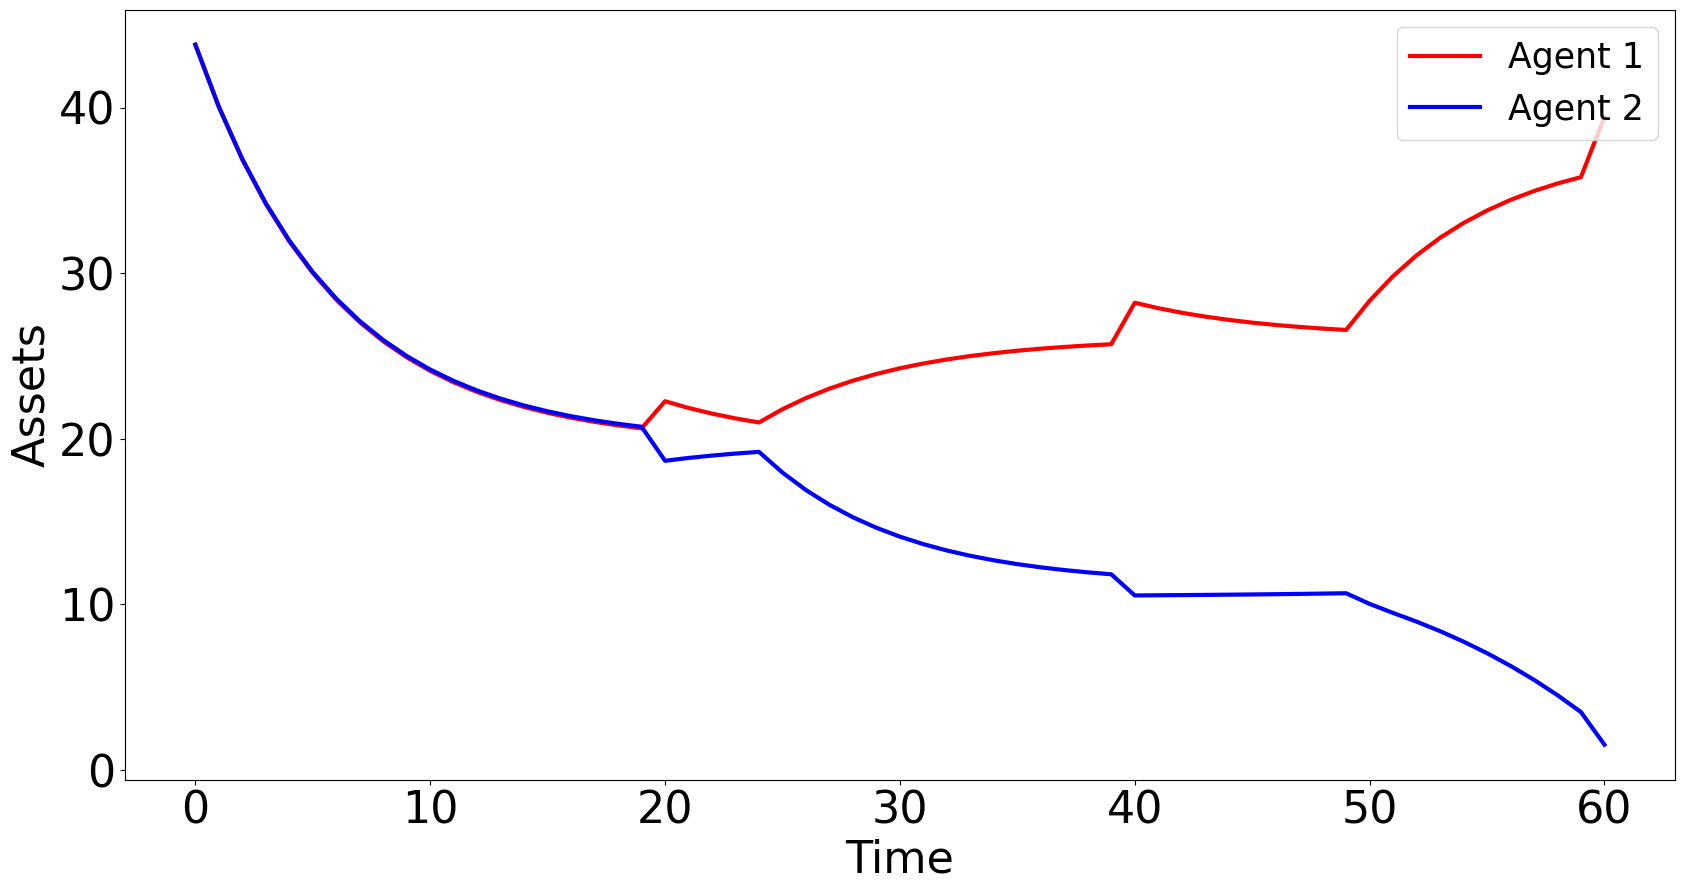

Window size : 10


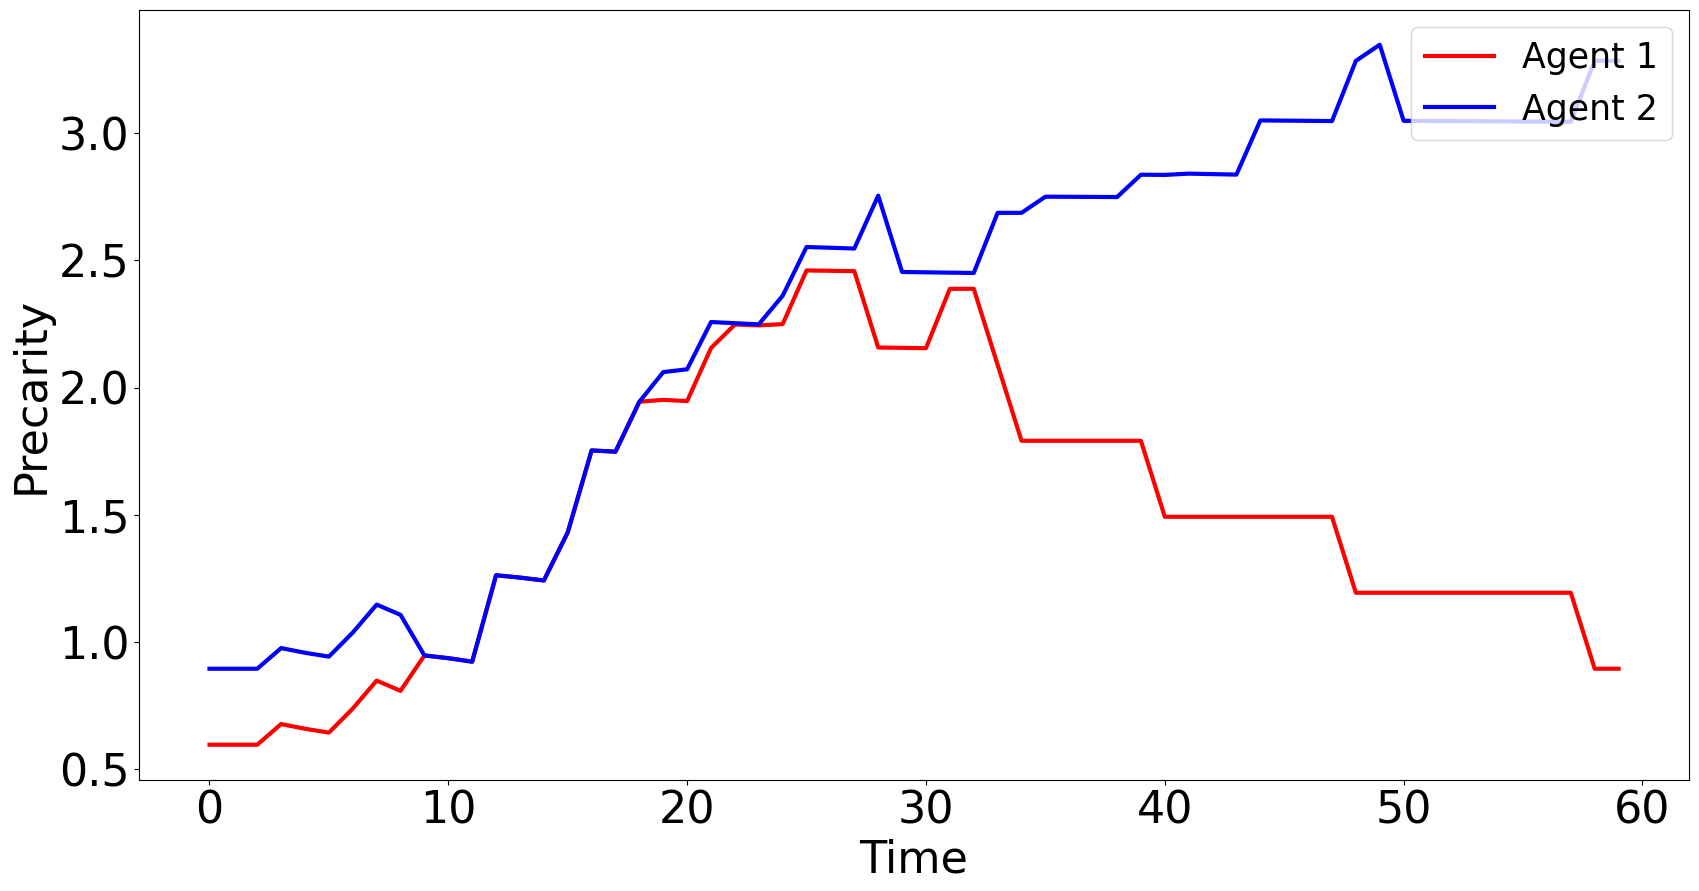

In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''

init_income = best_pair[1][1] #epsilon more income
init_saving = best_pair[1][0]#get_savings(init_income)
init_state_1 = getState([init_saving])[0]
a_1, inc_1 = compute_asset_series_static_clf(con_model, a_star, σ_star, init_state_1, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6)
init_saving_1 = init_saving
init_income1=init_income

init_income = best_pair[0][1] #getIncome(clf_real,savings_val,epsilon = -0.1) #epsilon less income
init_saving = best_pair[0][0] #savings_val#get_savings(init_income)
init_state_2 = getState([init_saving])[0]
a_2, inc_2 = compute_asset_series_static_clf(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6)
init_saving_2 = init_saving

plt.figure(1, figsize=(20, 10))
idxs_1 = [i for i in range(len(a_1))]
idxs_2 = [i for i in range(len(a_2))]

plt.plot(idxs_1,a_1,markevery=1,label="Agent 1",linewidth=3, color='red')#,width=0.4, align='edge')
plt.plot(idxs_2,a_2,markevery=1,label="Agent 2",linewidth=3, color='blue')

plt.legend(loc="upper right")
plt.ylabel('Assets')
plt.xlabel('Time')
plt.show()

'''Generating asset levels based on the real sequence'''
a_mean = np.array([a_1,a_2])
a_  = np.unique(a_mean)
assets_lvls = [np.percentile(a_,10*(i+1)) for i in range(10)]
asset_states = [i for i in range(10)]
a_1_seq = get_sequence(a_1,assets_lvls,asset_states)
a_2_seq = get_sequence(a_2,assets_lvls,asset_states)

'''Setting initial precarity states'''
delta = 1
init_prec_state_1 = min(np.array(get_sequence(np.array([init_saving_1]),assets_lvls,asset_states))[0]+delta,asset_states[-1])
init_prec_state_2 = max(np.array(get_sequence(np.array([init_saving_2]),assets_lvls,asset_states))[0]-delta,asset_states[0])

windows = [10]
ws = 10
print("Window size : %d" % (ws))

'''Calculating precarity'''
precarity_1 = []
for i in range(1,len(a_1)):
    weights_savings = generateWeight(a_1_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_1.append(precarityQuantification(a_1_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_1,windowSize=ws,useInit = True, useIncome = True, income = init_income1))

precarity_2 = []
for i in range(1,len(a_2)):
    weights_savings = generateWeight(a_2_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_2.append(precarityQuantification(a_2_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

plt.rcParams['figure.facecolor'] = 'white'

params__ = {'figure.facecolor': 'white','legend.fontsize': 25,
         'axes.labelsize': 32,
         'axes.titlesize':32,
         'xtick.labelsize':32,
         'ytick.labelsize':32}


plt.rcParams.update(params__)


plt.figure(2, figsize=(20, 10))
idxs_1 = [i for i in range(len(precarity_1))]
idxs_2 = [i for i in range(len(precarity_2))]

plt.plot(idxs_1,precarity_1,markevery=1,label="Agent 1",linewidth=3, color='red')
plt.plot(idxs_2,precarity_2,markevery=1,label="Agent 2",linewidth=3, color='blue')

plt.legend(loc="upper right")
plt.ylabel('Precarity')
plt.xlabel('Time')
plt.show()

### Introducing Interventions

In [ ]:
''' Compute assets when the income changes at intervals based on temporary and permanent shocks.
There is a decision maker and depnding on where the Agent is compared to the decision maker,
a shock could be either positive or negative.'''
def compute_asset_series_static_clf_interventions(con_model,
                                                  a_star,
                                                  σ_star,
                                                  z_init,
                                                  clf,
                                                  initincome=0,
                                                  T=500,
                                                  init_a = 0,
                                                  permanenet_shock_gap = 500,
                                                  temporary_shock_gap = 500,
                                                  permanenet_shock = 0,
                                                  temporary_shock = 0,
                                                  interventions ={}):

    #Identifying different types of interventions
    one_shot_interventions = {}
    temporal_interventions = {}
    for key in interventions:
      if(interventions[key]['type'] == 'one_shot'):
        one_shot_interventions[key] = interventions[key]['value']
      else:
        t = interventions[key]['duration']
        for i in range(t):
          temporal_interventions[key+i] = interventions[key]['rate_function']
    # Create consumption function by linear interpolation
    σ = lambda a, z : interp(a_star[:, z], σ_star[:, z], a)
    t_s = []

    # Simulate the asset path
    a = np.zeros(T+1)
    a[0] = init_a
    y_val = [initincome]
    current_income = initincome
    for t in range(T):
        label = clf.predict(np.array([[a[t],current_income]]))[0]
        #permanent shocks with negative decisions
        if ((t+1)%permanenet_shock_gap == 0 and label == 0):
          current_income *= (1-permanenet_shock)
        #permanent shocks with positive decisions
        elif ((t+1)%permanenet_shock_gap == 0 and label == 1):
          current_income *= (1+permanenet_shock)
        #saving current context
        y_tmp = current_income
        #temporary shocks with negative decisions
        if ((t+1)%temporary_shock_gap == 0 and label == 0):
          current_income *= (1-temporary_shock)
        #temporary shocks with positive decisions
        elif ((t+1)%temporary_shock_gap== 0 and label == 1):
          current_income *= (1+temporary_shock)
        ctmp = y_tmp

        #Handling interventions
        if((t+1) in one_shot_interventions):
          current_income += one_shot_interventions[t+1]
        if((t+1) in temporal_interventions):
          current_income *= temporal_interventions[t+1](current_income)

        #Calculating the consumption and consuming the maximum of it or the basic needs
        R = con_model.R()
        z = getIncomeState(current_income)
        s = a[t] - max(σ(a[t], z),basic_expenditure(y_tmp))
        a[t+1] = R * (s) + current_income
        y_val.append(current_income)
        if ((t+1)%temporary_shock_gap == 0):
          current_income = y_tmp
        current_income = y_tmp

        #Break at the point of ruin
        if(a[t+1]<=0):
          break
    return a, y_val

In [ ]:
# Come up with different functions rooted on tax information
def intervention_function(income):
  if(income<=9.700/12):
    return 1/(1-0.1)
  elif(income<=39.475/12):
    return 1/(1-0.12)
  elif(income<=84.200/12):
    return 1/(1-0.22)
  elif(income<=160.725/12):
    return 1/(1-0.24)
  elif(income<=204.100/12):
    return 1/(1-0.32)
  elif(income<=510.300/12):
    return 1/(1-0.35)
  else:
    return 1/(1-0.37)

#### Tax Incentives

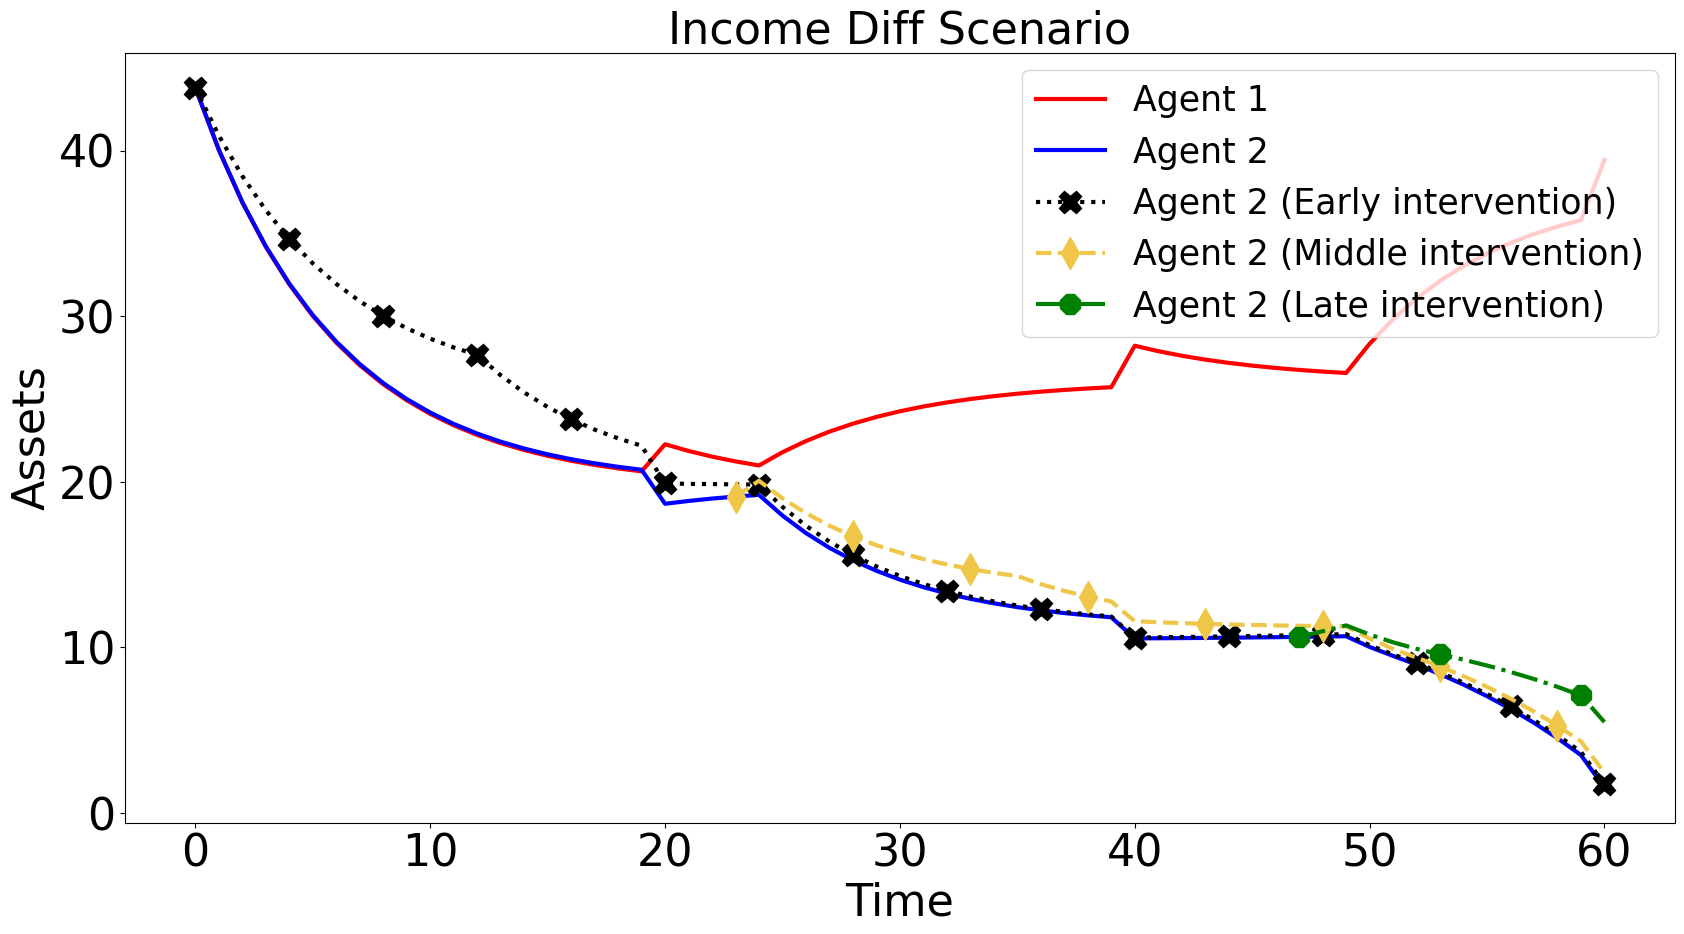

Window size : 10


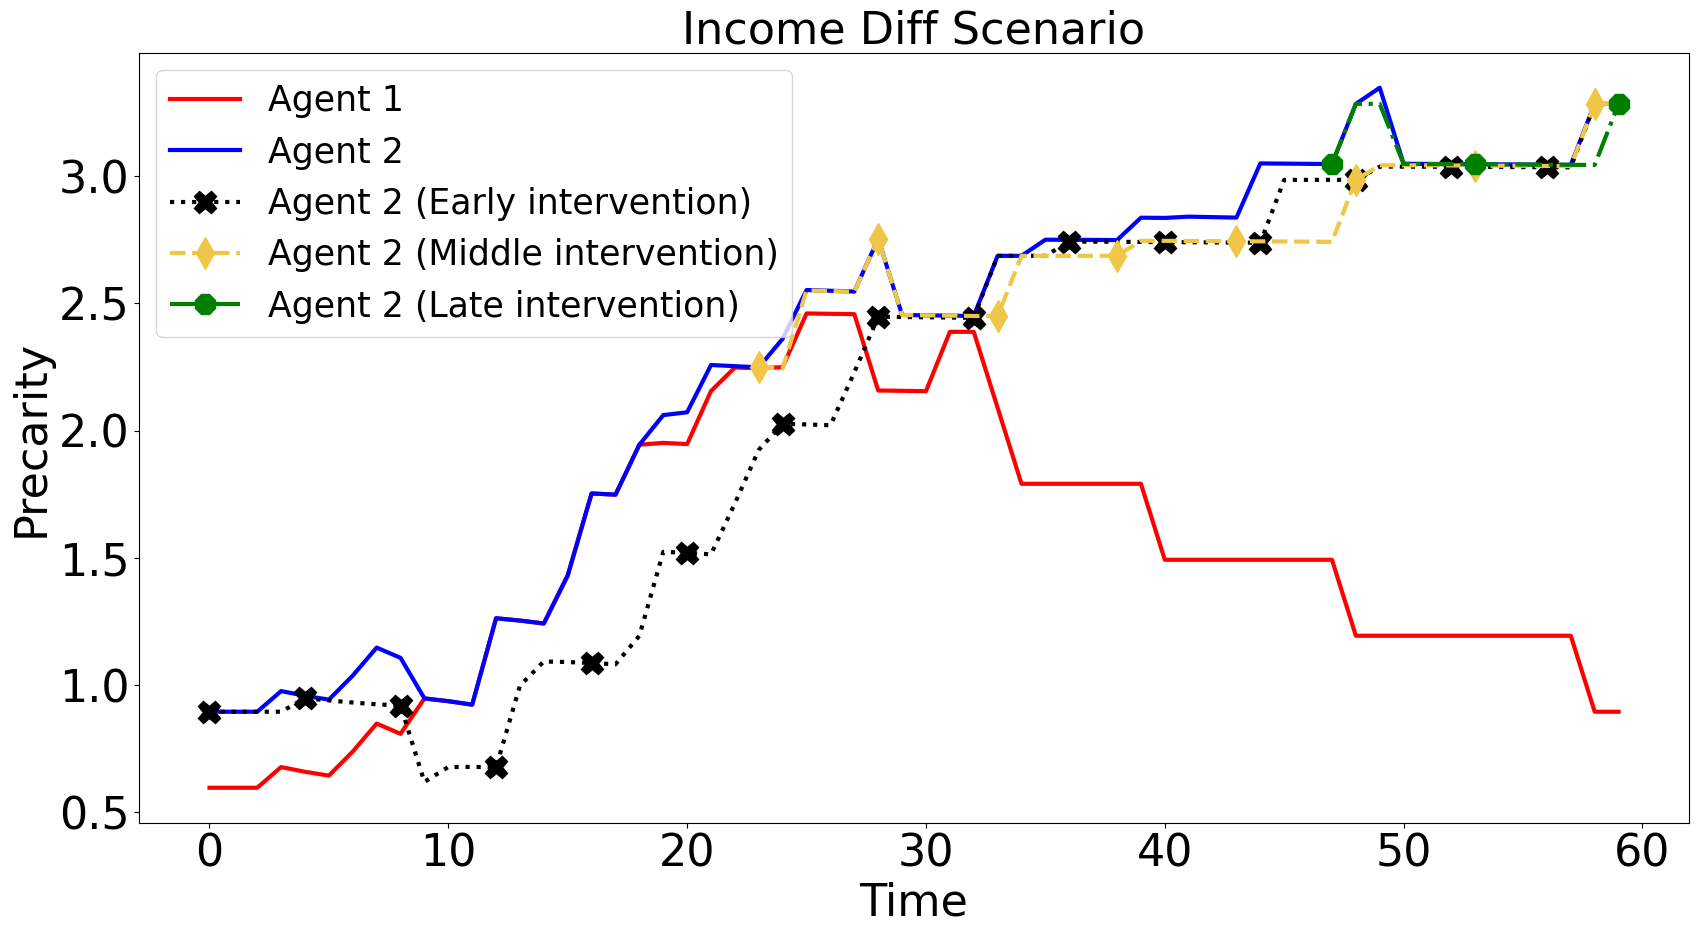

In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''

init_income = best_pair[1][1]
init_saving = best_pair[1][0]
init_state_1 = getState([init_saving])[0]
a_1, inc_1 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_1, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6)
init_saving_1 = init_saving
init_income1=init_income

init_income = best_pair[0][1]
init_saving = best_pair[0][0]
init_state_2 = getState([init_saving])[0]
interventions = {}
a_2, inc_2 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
init_saving_2 = init_saving

init_income = best_pair[0][1]
init_saving = best_pair[0][0]
init_state_2 = getState([init_saving])[0]
interventions = {1: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
a_3, inc_3 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
init_saving_2 = init_saving

init_income = best_pair[0][1]
init_saving = best_pair[0][0]
init_state_2 = getState([init_saving])[0]
interventions = {24: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
a_4, inc_4 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
init_saving_2 = init_saving

init_income = best_pair[0][1]
init_saving = best_pair[0][0]
init_state_2 = getState([init_saving])[0]
interventions = {48: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
a_5, inc_5 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
init_saving_2 = init_saving

plt.figure(1, figsize=(20, 10))
idxs_1 = [i for i in range(len(a_1))]
idxs_2 = [i for i in range(len(a_2))]
idxs_3 = [i for i in range(len(a_3))]
idxs_4 = [i for i in range(len(a_4))]
idxs_5 = [i for i in range(len(a_5))]

plt.plot(idxs_1,a_1,markevery=1,label="Agent 1",linewidth=3, color='red')#,width=0.4, align='edge')
plt.plot(idxs_2,a_2,markevery=1,label="Agent 2",linewidth=3, color='blue')
plt.plot(idxs_3,a_3,markevery=4, markersize=16,marker="X",label="Agent 2 (Early intervention)",linewidth=3, color='black', linestyle='dotted')
plt.plot(idxs_4[23:],a_4[23:],markevery=5, markersize=16,marker="d",label="Agent 2 (Middle intervention)",linewidth=3, color='#f0c648', linestyle='dashed')
plt.plot(idxs_5[47:],a_5[47:],markevery=6, markersize=16,marker="8",label="Agent 2 (Late intervention)",linewidth=3, color='green', linestyle='dashdot')

plt.legend(loc="upper right")
plt.ylabel('Assets')
plt.xlabel('Time')
plt.title('Income Diff Scenario')
plt.show()

'''Generating asset levels based on the real sequence'''
a_mean = np.array([a_1,a_2])
a_  = np.unique(a_mean)
assets_lvls = [np.percentile(a_,10*(i+1)) for i in range(10)]
asset_states = [i for i in range(10)]
a_1_seq = get_sequence(a_1,assets_lvls,asset_states)
a_2_seq = get_sequence(a_2,assets_lvls,asset_states)
a_3_seq = get_sequence(a_3,assets_lvls,asset_states)
a_4_seq = get_sequence(a_4,assets_lvls,asset_states)
a_5_seq = get_sequence(a_5,assets_lvls,asset_states)

'''Setting initial precarity states'''
delta = 1
init_prec_state_1 = min(np.array(get_sequence(np.array([init_saving_1]),assets_lvls,asset_states))[0]+delta,asset_states[-1])
init_prec_state_2 = max(np.array(get_sequence(np.array([init_saving_2]),assets_lvls,asset_states))[0]-delta,asset_states[0])

windows = [10]
ws = 10
print("Window size : %d" % (ws))

'''Calculating precarity'''
precarity_1 = []
for i in range(1,len(a_1)):
    weights_savings = generateWeight(a_1_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_1.append(precarityQuantification(a_1_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_1,windowSize=ws,useInit = True, useIncome = True, income = init_income1))

precarity_2 = []
for i in range(1,len(a_2)):
    weights_savings = generateWeight(a_2_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_2.append(precarityQuantification(a_2_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_3 = []
for i in range(1,len(a_3)):
    weights_savings = generateWeight(a_3_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_3.append(precarityQuantification(a_3_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_4 = []
for i in range(1,len(a_4)):
    weights_savings = generateWeight(a_4_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_4.append(precarityQuantification(a_4_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_5 = []
for i in range(1,len(a_5)):
    weights_savings = generateWeight(a_5_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_5.append(precarityQuantification(a_5_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

d_3 = np.subtract(a_3,a_2)
d_4 = np.subtract(a_4,a_2)
d_5 = np.subtract(a_5,a_2)

plt.figure(2, figsize=(20, 10))

idxs_1 = [i for i in range(len(precarity_1))]
idxs_2 = [i for i in range(len(precarity_2))]
idxs_3 = [i for i in range(len(precarity_3))]
idxs_4 = [i for i in range(len(precarity_4))]
idxs_5 = [i for i in range(len(precarity_5))]

plt.plot(idxs_1,precarity_1,markevery=1,label="Agent 1",linewidth=3, color='red')
plt.plot(idxs_2,precarity_2,markevery=1,label="Agent 2",linewidth=3, color='blue')
plt.plot(idxs_3,precarity_3,markevery=4, markersize=16,marker="X",label="Agent 2 (Early intervention)",linewidth=3, color='black', linestyle='dotted')
plt.plot(idxs_4[23:],precarity_4[23:],markevery=5, markersize=16,marker="d",label="Agent 2 (Middle intervention)",linewidth=3, color='#f0c648', linestyle='dashed')
plt.plot(idxs_5[47:],precarity_5[47:],markevery=6, markersize=16,marker="8",label="Agent 2 (Late intervention)",linewidth=3, color='green', linestyle='dashdot')

plt.legend(loc="upper left")
plt.ylabel('Precarity')
plt.xlabel('Time')
plt.title('Income Diff Scenario')
plt.show()

#### Direct Subsidies

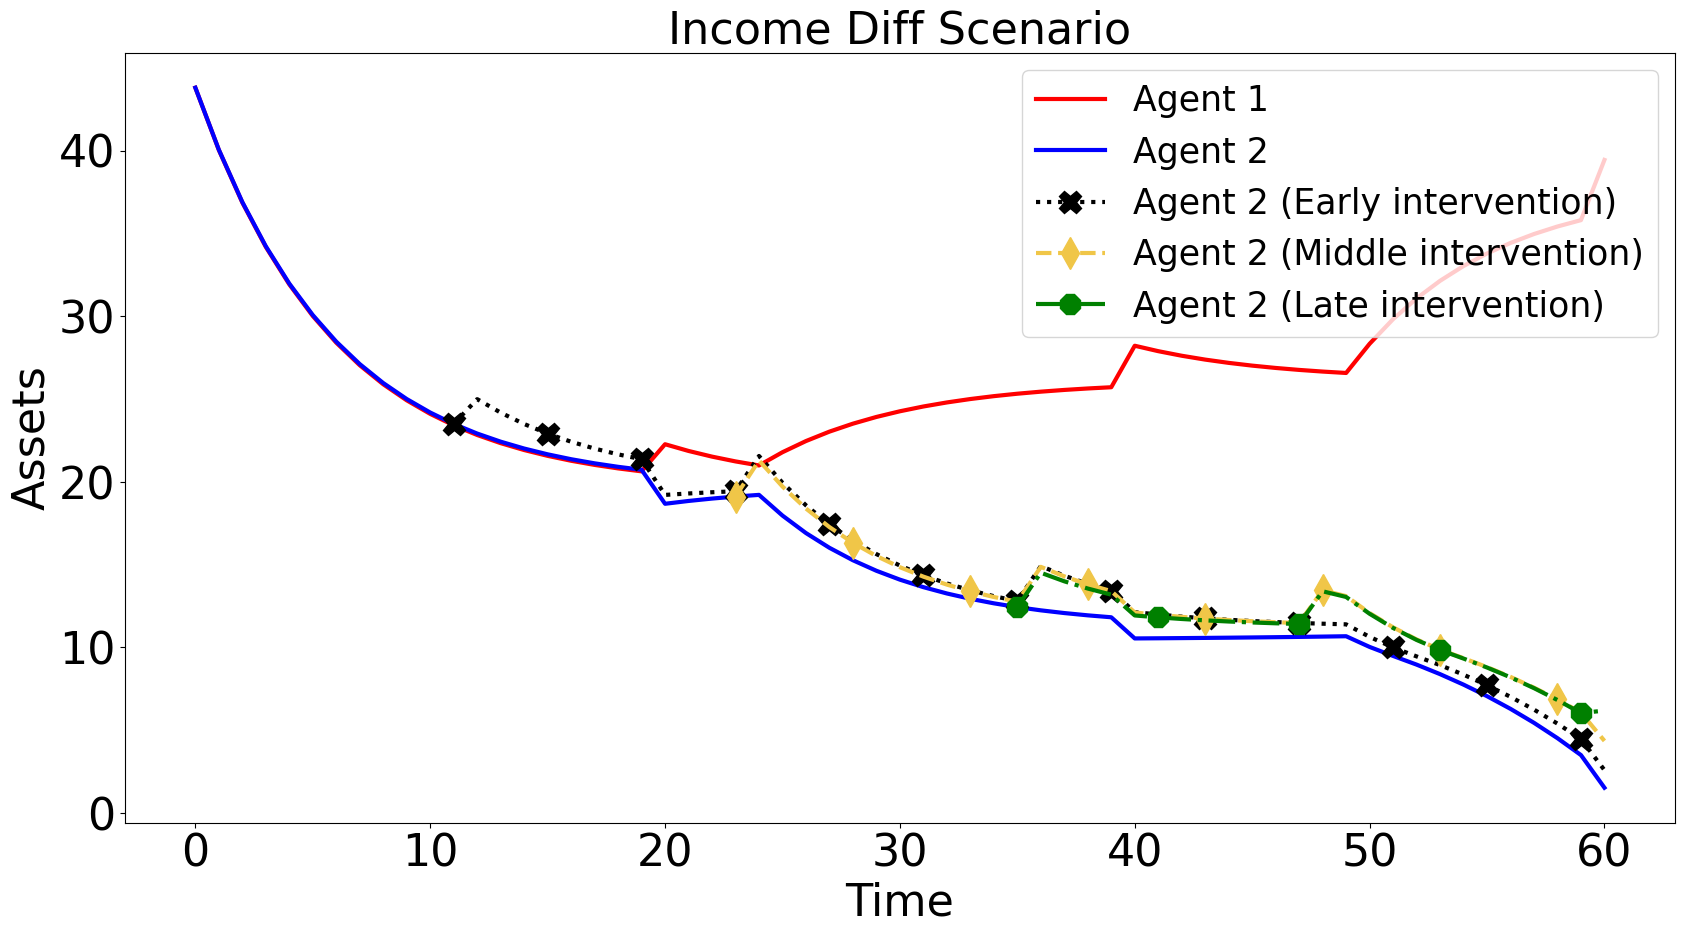

Window size : 10


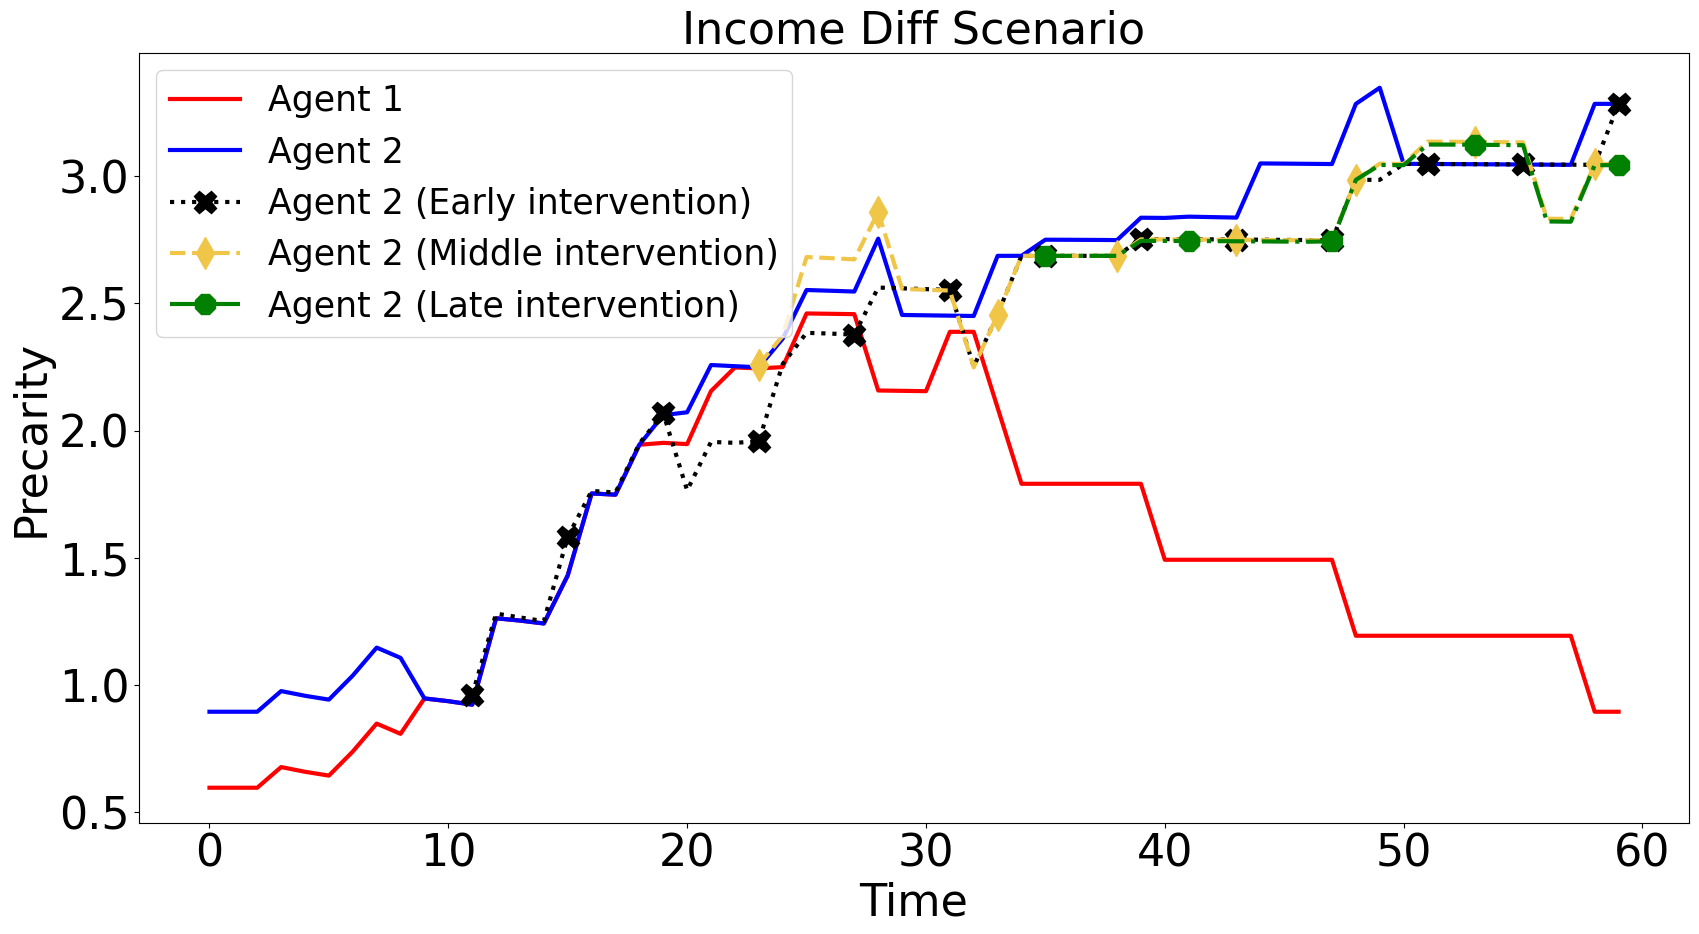

In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''


init_income = best_pair[1][1]
init_saving = best_pair[1][0]
init_state_1 = getState([init_saving])[0]
a_1, inc_1 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_1, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6)
init_saving_1 = init_saving
init_income1=init_income

init_income = best_pair[0][1]
init_saving = best_pair[0][0]
init_state_2 = getState([init_saving])[0]
interventions = {}
a_2, inc_2 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
init_saving_2 = init_saving

init_income = best_pair[0][1]
init_saving = best_pair[0][0]
init_state_2 = getState([init_saving])[0]
interventions = {12: {'type':'one_shot', 'value': 3},24: {'type':'one_shot', 'value': 3},36: {'type':'one_shot', 'value': 3}}
a_3, inc_3 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
init_saving_2 = init_saving

init_income = best_pair[0][1]
init_saving = best_pair[0][0]
init_state_2 = getState([init_saving])[0]
interventions = {24: {'type':'one_shot', 'value': 3},36: {'type':'one_shot', 'value': 3},48: {'type':'one_shot', 'value': 3}}
a_4, inc_4 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
init_saving_2 = init_saving

init_income = best_pair[0][1]
init_saving = best_pair[0][0]
init_state_2 = getState([init_saving])[0]
interventions = {36: {'type':'one_shot', 'value': 3},48: {'type':'one_shot', 'value': 3},60: {'type':'one_shot', 'value': 3}}
a_5, inc_5 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
init_saving_2 = init_saving

plt.figure(1, figsize=(20, 10))
idxs_1 = [i for i in range(len(a_1))]
idxs_2 = [i for i in range(len(a_2))]
idxs_3 = [i for i in range(len(a_3))]
idxs_4 = [i for i in range(len(a_4))]
idxs_5 = [i for i in range(len(a_5))]

plt.plot(idxs_1,a_1,markevery=1,label="Agent 1",linewidth=3, color='red')#,width=0.4, align='edge')
plt.plot(idxs_2,a_2,markevery=1,label="Agent 2",linewidth=3, color='blue')
plt.plot(idxs_3[11:],a_3[11:],markevery=4, markersize=16,marker="X",label="Agent 2 (Early intervention)",linewidth=3, color='black', linestyle='dotted')
plt.plot(idxs_4[23:],a_4[23:],markevery=5, markersize=16,marker="d",label="Agent 2 (Middle intervention)",linewidth=3, color='#f0c648', linestyle='dashed')
plt.plot(idxs_5[35:],a_5[35:],markevery=6, markersize=16,marker="8",label="Agent 2 (Late intervention)",linewidth=3, color='green', linestyle='dashdot')

plt.legend(loc="upper right")
plt.ylabel('Assets')
plt.xlabel('Time')
plt.title('Income Diff Scenario')
plt.show()

'''Generating asset levels based on the real sequence'''
a_mean = np.array([a_1,a_2])
a_  = np.unique(a_mean)
assets_lvls = [np.percentile(a_,10*(i+1)) for i in range(10)]
asset_states = [i for i in range(10)]
a_1_seq = get_sequence(a_1,assets_lvls,asset_states)
a_2_seq = get_sequence(a_2,assets_lvls,asset_states)
a_3_seq = get_sequence(a_3,assets_lvls,asset_states)
a_4_seq = get_sequence(a_4,assets_lvls,asset_states)
a_5_seq = get_sequence(a_5,assets_lvls,asset_states)

'''Setting initial precarity states'''
delta = 1
init_prec_state_1 = min(np.array(get_sequence(np.array([init_saving_1]),assets_lvls,asset_states))[0]+delta,asset_states[-1])
init_prec_state_2 = max(np.array(get_sequence(np.array([init_saving_2]),assets_lvls,asset_states))[0]-delta,asset_states[0])

windows = [10]
ws = 10
print("Window size : %d" % (ws))

'''Calculating precarity'''
precarity_1 = []
for i in range(1,len(a_1)):
    weights_savings = generateWeight(a_1_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_1.append(precarityQuantification(a_1_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_1,windowSize=ws,useInit = True, useIncome = True, income = init_income1))

precarity_2 = []
for i in range(1,len(a_2)):
    weights_savings = generateWeight(a_2_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_2.append(precarityQuantification(a_2_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_3 = []
for i in range(1,len(a_3)):
    weights_savings = generateWeight(a_3_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_3.append(precarityQuantification(a_3_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_4 = []
for i in range(1,len(a_4)):
    weights_savings = generateWeight(a_4_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_4.append(precarityQuantification(a_4_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_5 = []
for i in range(1,len(a_5)):
    weights_savings = generateWeight(a_5_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_5.append(precarityQuantification(a_5_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

d_3 = np.subtract(a_3,a_2)
d_4 = np.subtract(a_4,a_2)
d_5 = np.subtract(a_5,a_2)

plt.figure(2, figsize=(20, 10))

idxs_1 = [i for i in range(len(precarity_1))]
idxs_2 = [i for i in range(len(precarity_2))]
idxs_3 = [i for i in range(len(precarity_3))]
idxs_4 = [i for i in range(len(precarity_4))]
idxs_5 = [i for i in range(len(precarity_5))]

plt.plot(idxs_1,precarity_1,markevery=1,label="Agent 1",linewidth=3, color='red')
plt.plot(idxs_2,precarity_2,markevery=1,label="Agent 2",linewidth=3, color='blue')
plt.plot(idxs_3[11:],precarity_3[11:],markevery=4, markersize=16,marker="X",label="Agent 2 (Early intervention)",linewidth=3, color='black', linestyle='dotted')
plt.plot(idxs_4[23:],precarity_4[23:],markevery=5, markersize=16,marker="d",label="Agent 2 (Middle intervention)",linewidth=3, color='#f0c648', linestyle='dashed')
plt.plot(idxs_5[35:],precarity_5[35:],markevery=6, markersize=16,marker="8",label="Agent 2 (Late intervention)",linewidth=3, color='green', linestyle='dashdot')


plt.legend(loc="upper left")
plt.ylabel('Precarity')
plt.xlabel('Time')
plt.title('Income Diff Scenario')
plt.show()

# Gig worker vs. Office worker Scenario

## Different income distributions method

In [ ]:
''' Compute assets when the income changes at specified points with specified shocks (type and size).
There is no real decision maker unless we add a decision maker as well.'''
def compute_asset_series_income_distribution(con_model,
                                             a_star,
                                             σ_star,
                                             initincome=0,
                                             T=500_000,
                                             init_a = 0,
                                             income_distribution = {},
                                             clf_info={'function':None, 'perm_gap': 100, 'perm_shock': 0, 'temp_gap': 100, 'temp_shock': 0}
                                             ,interventions={}):
    # Create consumption function by linear interpolation

    #Identifying different types of interventions
    one_shot_interventions = {}
    temporal_interventions = {}
    for key in interventions:
      if(interventions[key]['type'] == 'one_shot'):
        one_shot_interventions[key] = interventions[key]['value']
      else:
        t = interventions[key]['duration']
        for i in range(t):
          temporal_interventions[key+i] = interventions[key]['rate_function']
    σ = lambda a, z : interp(a_star[:, z], σ_star[:, z], a)
    t_s = []
    # Simulate the asset path
    a = np.zeros(T+1)
    a[0] = init_a
    y_val = [initincome]
    current_income = initincome
    for t in range(T):
        rp = 1
        rt = 1
        if((t+1) in income_distribution):
          current_income = income_distribution[t+1]
        #clf_info={'function':None, 'perm_gap': 100, 'perm_shock': 0, 'temp_gap': 100, 'temp_shock': 0}
        y_tmp = current_income
        if(clf_info['function']!=None):
          label = clf_info['function'].predict(np.array([[a[t],current_income]]))[0]
          if (((t+1)%clf_info['perm_gap'] == 0) and label == 0):
            current_income *= (1-clf_info['perm_shock']) #permanent shocks with negative decisions
          elif (((t+1)%clf_info['perm_gap'] == 0) and label == 1):
            current_income *= (1+clf_info['perm_shock']) #permanent shocks with positive decisions
            y_tmp = current_income
          if (((t+1)%clf_info['temp_gap'] == 0) and label == 0):
            current_income *= (1-clf_info['temp_shock']) #temporary shocks with negative decisions
          elif (((t+1)%clf_info['temp_gap']== 0) and label == 1):
            current_income *= (1+clf_info['temp_shock']) #temporary sho
        #Handling interventions
        if((t+1) in one_shot_interventions):
          current_income += one_shot_interventions[t+1]
        if((t+1) in temporal_interventions):
          current_income *= temporal_interventions[t+1](current_income)
        R = con_model.R()
        z = getIncomeState(current_income)
        s = a[t] - max(σ(a[t], z),basic_expenditure(current_income)) #Calculating the consumption and consuming the maximum of it or the basic needs
        a[t+1] = R * (s) + current_income
        y_val.append(current_income)
        current_income = y_tmp
        if(a[t+1]<=0): #Make sure we don't keep going bankrupt
          break
    return a, y_val

In [ ]:
inc_30 = (np.percentile(incomes, 30))
inc_80 = (np.percentile(incomes, 80))
low = []
high = []
mid = []
for i in incomes:
  if(i<=inc_30):
    low.append(i)
  elif(i>=inc_80):
    high.append(i)
  else:
    mid.append(i)
low = np.array(low)
high = np.array(high)
mid = np.array(mid)

def generateIncomeDistributionList(time_slots):
  incomes_dict = {}
  for t in time_slots:
    incomes_dict[t] = np.random.choice(np.array(low))
  return incomes_dict

## Running experiments: Gig worker vs. Office worker Scenario

### Incoporating classifier

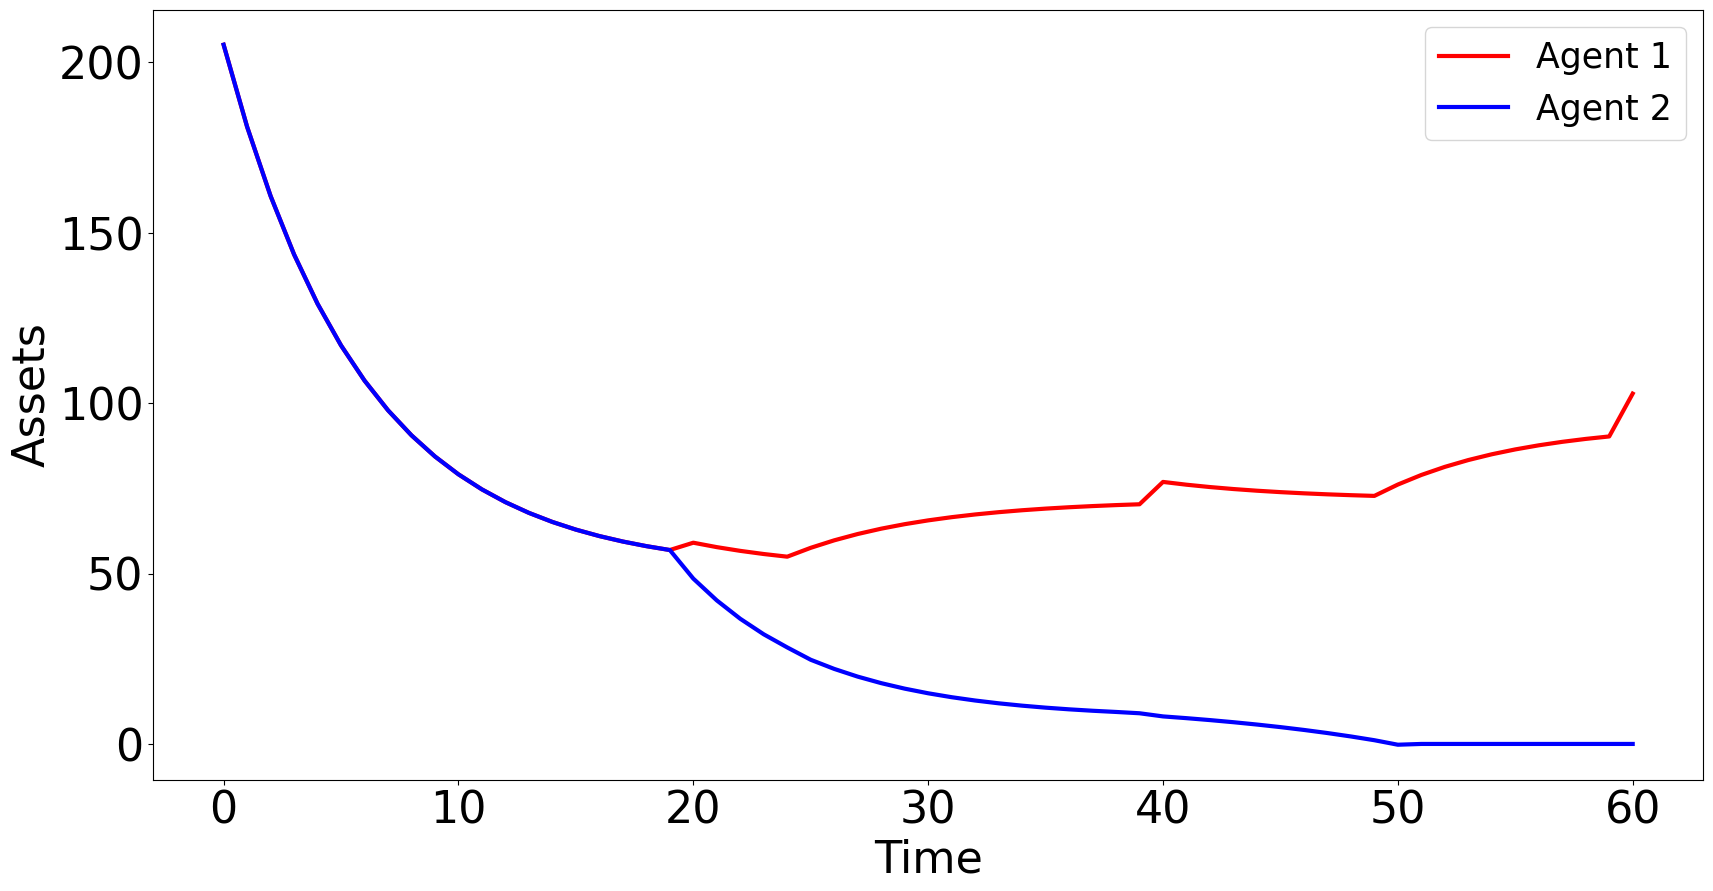

Window size : 10


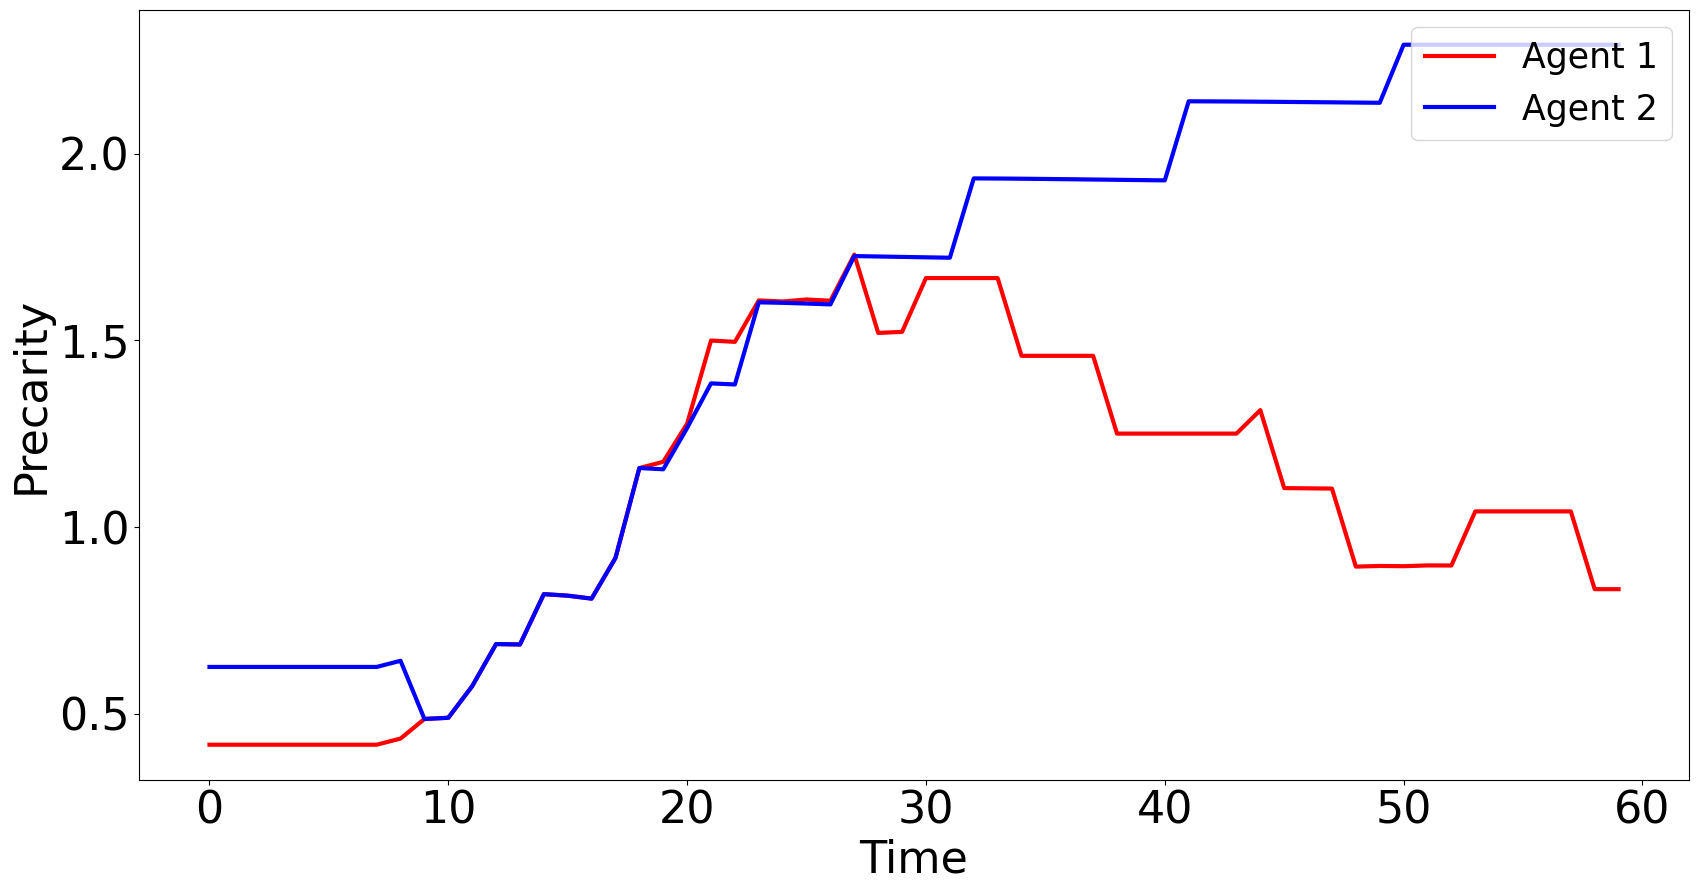

In [ ]:
''' Two Agents with different precarity and different shocks '''
T = 60
np.random.seed(exp_seed)
init_income = np.random.choice(np.array(incomes))
init_saving_1 = get_savings(init_income)
init_saving_2 = get_savings(init_income)
init_state_1 = getState([init_saving_1])[0]
init_state_2 = getState([init_saving_2])[0]
income_distribution_1 = generateIncomeDistributionList([])
income_distribution_2 = generateIncomeDistributionList([20])

clf_info={'function':clf_real, 'perm_gap': 25, 'perm_shock': 0.4, 'temp_gap': 20, 'temp_shock': 0.6}
a_1, inc_1 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_1, income_distribution = income_distribution_1, clf_info= clf_info)
a_2, inc_2 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info)
a_3, inc_3 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_1, income_distribution = income_distribution_1)
'''Generating assets series'''
#a_1, inc_1 = compute_asset_series_shock_new(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_1, shocks = shocks, hshck={100:1})
#a_2, inc_2 = compute_asset_series_shock_new(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, shocks = shocks, hshck={30:0.3, 50:0.4, 70: 0.6})

plt.figure(1, figsize=(20, 10))
idxs_1 = [i for i in range(len(a_1))]
idxs_2 = [i for i in range(len(a_2))]
idxs_3 = [i for i in range(len(a_3))]

plt.plot(idxs_1,a_1,markevery=1,label="Agent 1",linewidth=3, color='red')#,width=0.4, align='edge')
plt.plot(idxs_2,a_2,markevery=1,label="Agent 2",linewidth=3, color='blue')
#plt.plot(idxs_3,a_3,markevery=1,label="Agent 2",linewidth=3, color='black', linestyle='dotted')

plt.legend(loc="upper right")
plt.ylabel('Assets')
plt.xlabel('Time')
plt.show()

'''Generating asset levels based on the real sequence'''
a_mean = np.array([a_1,a_2])
a_  = np.unique(a_mean)
assets_lvls = [np.percentile(a_,10*(i+1)) for i in range(10)]
asset_states = [i for i in range(10)]
a_1_seq = get_sequence(a_1,assets_lvls,asset_states)
a_2_seq = get_sequence(a_2,assets_lvls,asset_states)

''' Setting initial states that are different (2delta apart)'''
delta = 1
init_prec_state_1 = min(np.array(get_sequence(np.array([init_saving_1]),assets_lvls,asset_states))[0]+delta,asset_states[-1])
init_prec_state_2 = max(np.array(get_sequence(np.array([init_saving_2]),assets_lvls,asset_states))[0]-delta,asset_states[0])


ws = 10
print("Window size : %d" % (ws))

'''Calculating precarity'''
precarity_1 = []
for i in range(1,len(a_1)):
    weights_savings = generateWeight(a_1_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_1.append(precarityQuantification(a_1_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_1,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_2 = []
for i in range(1,len(a_2)):
    weights_savings = generateWeight(a_2_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_2.append(precarityQuantification(a_2_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

plt.figure(2, figsize=(20, 10))
idxs_1 = [i for i in range(len(precarity_1))]
idxs_2 = [i for i in range(len(precarity_2))]

plt.plot(idxs_1,precarity_1,markevery=1,label="Agent 1",linewidth=3, color='red')
plt.plot(idxs_2,precarity_2,markevery=1,label="Agent 2",linewidth=3, color='blue')

plt.legend(loc="upper right")
plt.ylabel('Precarity')
plt.xlabel('Time')
plt.show()

#### Direct Subsidies

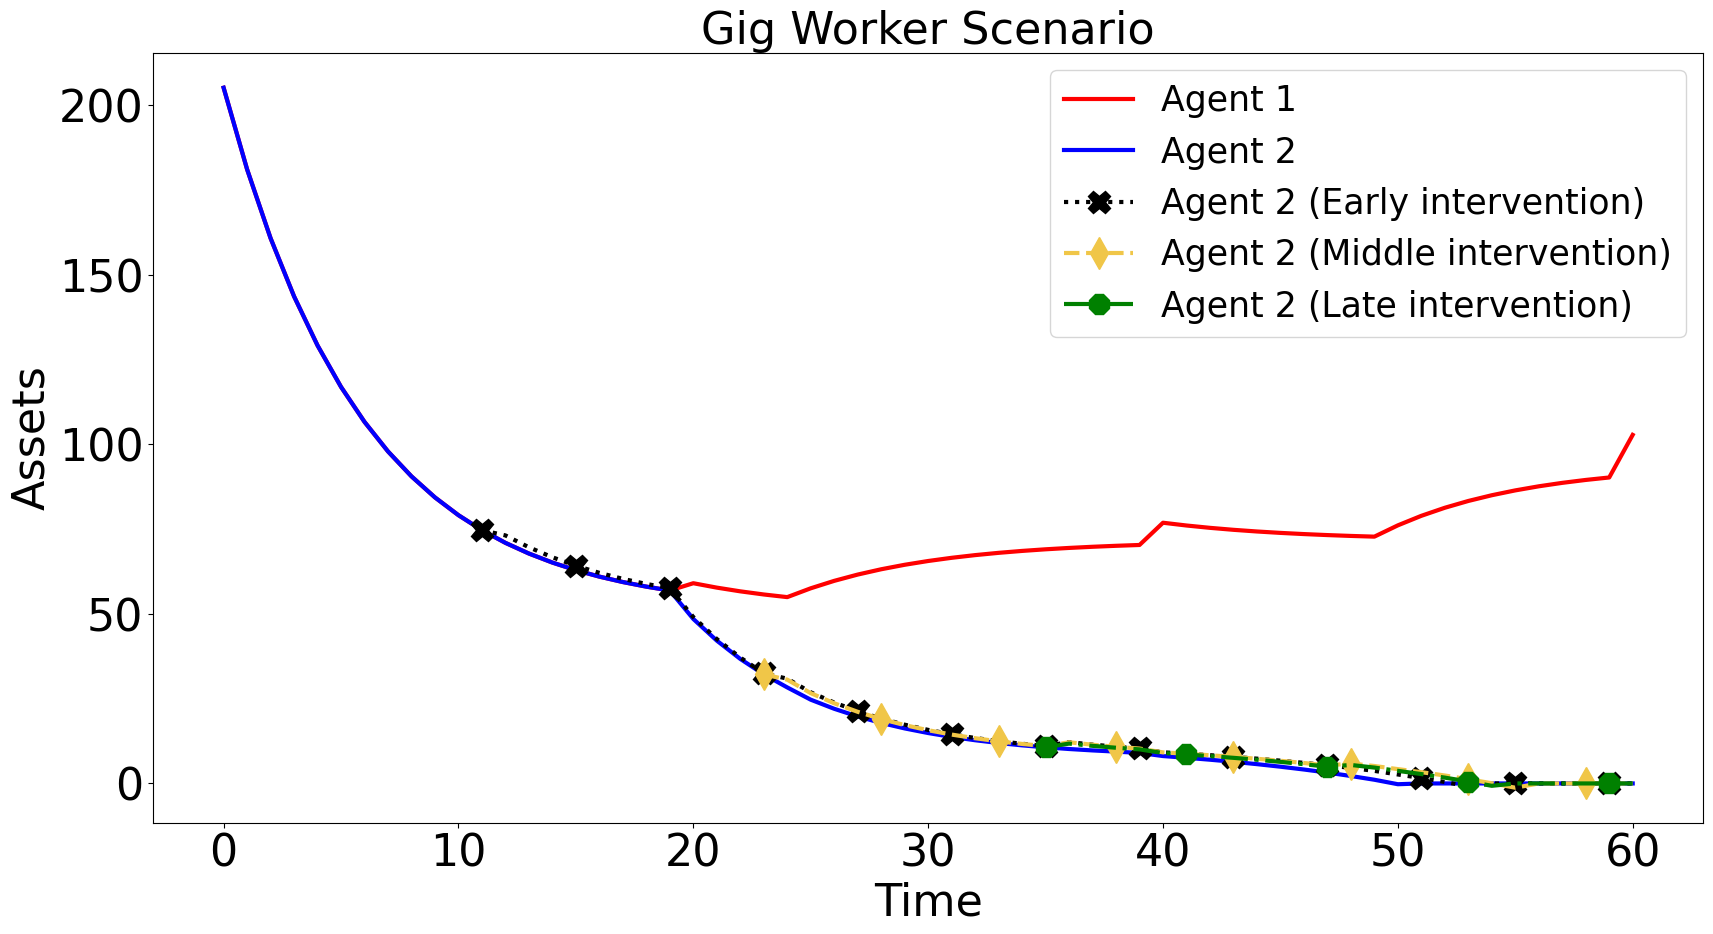

Window size : 10


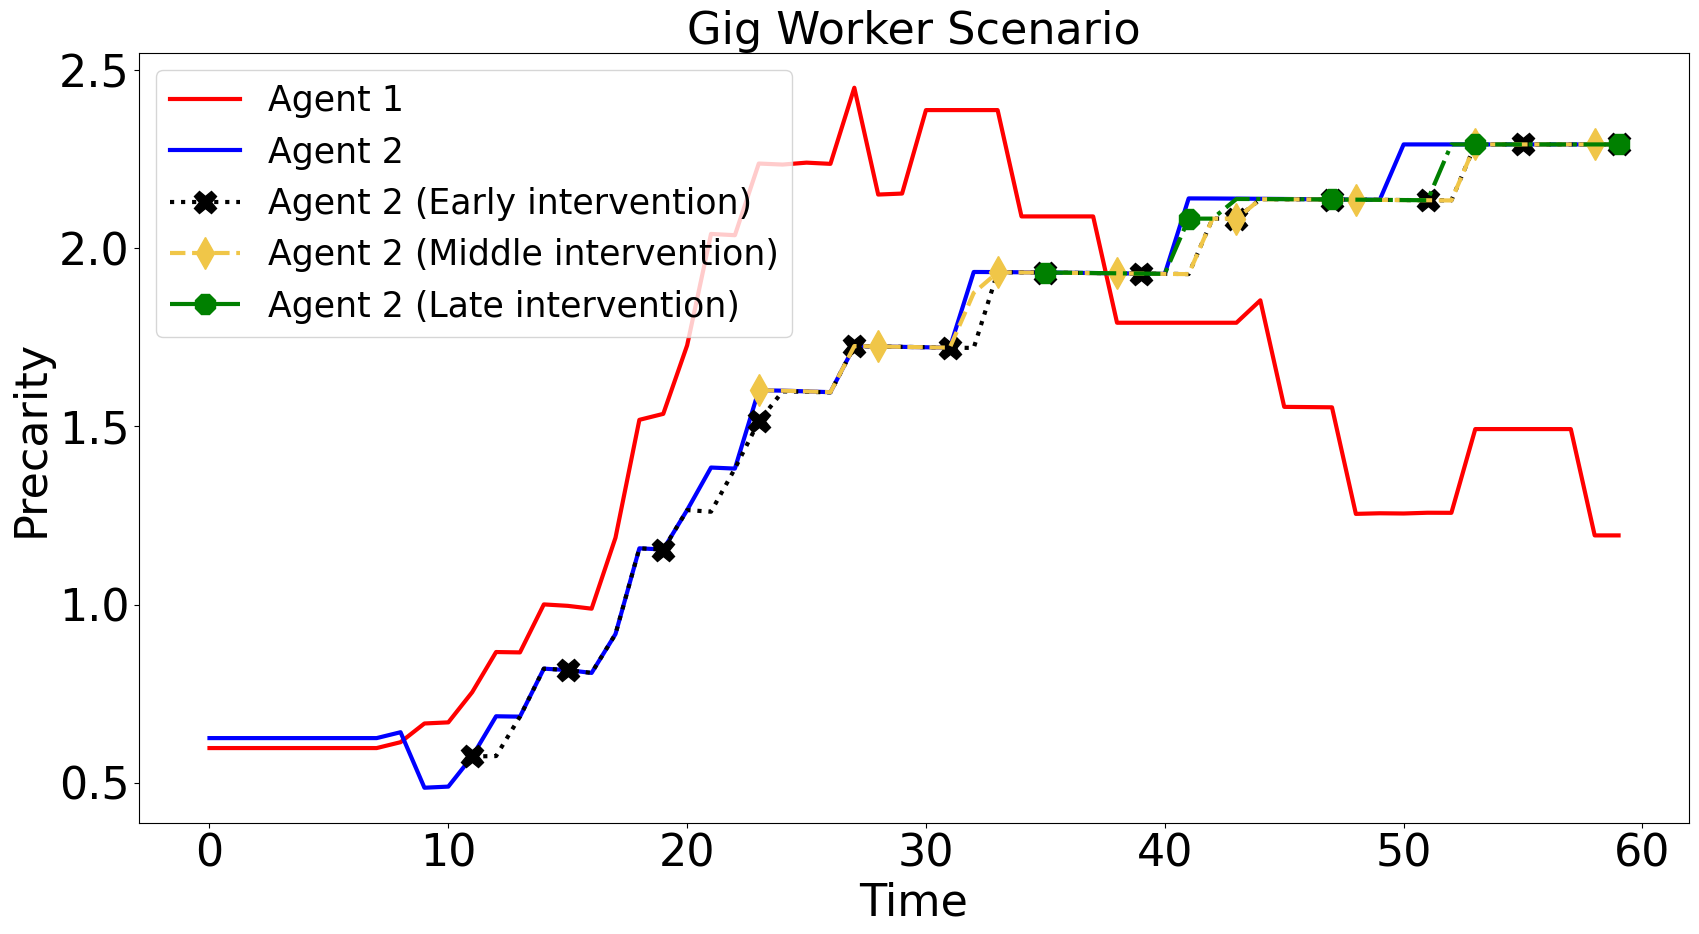

In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''

a_1, inc_1 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_1, income_distribution = income_distribution_1, clf_info= clf_info)
a_2, inc_2 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info)


interventions = {12: {'type':'one_shot', 'value': 3},24: {'type':'one_shot', 'value': 3},36: {'type':'one_shot', 'value': 3}}
a_3, inc_3 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

interventions = {24: {'type':'one_shot', 'value': 3},36: {'type':'one_shot', 'value': 3},48: {'type':'one_shot', 'value': 3}}
a_4, inc_4 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)


interventions = {36: {'type':'one_shot', 'value': 3},48: {'type':'one_shot', 'value': 3},60: {'type':'one_shot', 'value': 3}}
a_5, inc_5 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

plt.figure(1, figsize=(20, 10))
idxs_1 = [i for i in range(len(a_1))]
idxs_2 = [i for i in range(len(a_2))]
idxs_3 = [i for i in range(len(a_3))]
idxs_4 = [i for i in range(len(a_4))]
idxs_5 = [i for i in range(len(a_5))]

plt.plot(idxs_1,a_1,markevery=1,label="Agent 1",linewidth=3, color='red')#,width=0.4, align='edge')
plt.plot(idxs_2,a_2,markevery=1,label="Agent 2",linewidth=3, color='blue')
plt.plot(idxs_3[11:],a_3[11:],markevery=4, markersize=16,marker="X",label="Agent 2 (Early intervention)",linewidth=3, color='black', linestyle='dotted')
plt.plot(idxs_4[23:],a_4[23:],markevery=5, markersize=16,marker="d",label="Agent 2 (Middle intervention)",linewidth=3, color='#f0c648', linestyle='dashed')
plt.plot(idxs_5[35:],a_5[35:],markevery=6, markersize=16,marker="8",label="Agent 2 (Late intervention)",linewidth=3, color='green', linestyle='dashdot')

plt.legend(loc="upper right")
plt.ylabel('Assets')
plt.xlabel('Time')
plt.title('Gig Worker Scenario')
plt.show()

'''Generating asset levels based on the real sequence'''
a_mean = np.array([a_1,a_2])
a_  = np.unique(a_mean)
assets_lvls = [np.percentile(a_,10*(i+1)) for i in range(10)]
asset_states = [i for i in range(10)]
a_1_seq = get_sequence(a_1,assets_lvls,asset_states)
a_2_seq = get_sequence(a_2,assets_lvls,asset_states)
a_3_seq = get_sequence(a_3,assets_lvls,asset_states)
a_4_seq = get_sequence(a_4,assets_lvls,asset_states)
a_5_seq = get_sequence(a_5,assets_lvls,asset_states)

'''Setting initial precarity states'''
delta = 1
init_prec_state_1 = min(np.array(get_sequence(np.array([init_saving_1]),assets_lvls,asset_states))[0]+delta,asset_states[-1])
init_prec_state_2 = max(np.array(get_sequence(np.array([init_saving_2]),assets_lvls,asset_states))[0]-delta,asset_states[0])

windows = [10]
ws = 10
print("Window size : %d" % (ws))

'''Calculating precarity'''
precarity_1 = []
for i in range(1,len(a_1)):
    weights_savings = generateWeight(a_1_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_1.append(precarityQuantification(a_1_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_1,windowSize=ws,useInit = True, useIncome = True, income = init_income1))

precarity_2 = []
for i in range(1,len(a_2)):
    weights_savings = generateWeight(a_2_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_2.append(precarityQuantification(a_2_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_3 = []
for i in range(1,len(a_3)):
    weights_savings = generateWeight(a_3_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_3.append(precarityQuantification(a_3_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_4 = []
for i in range(1,len(a_4)):
    weights_savings = generateWeight(a_4_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_4.append(precarityQuantification(a_4_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_5 = []
for i in range(1,len(a_5)):
    weights_savings = generateWeight(a_5_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_5.append(precarityQuantification(a_5_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

d_3 = np.subtract(a_3,a_2)
d_4 = np.subtract(a_4,a_2)
d_5 = np.subtract(a_5,a_2)

plt.figure(2, figsize=(20, 10))

idxs_1 = [i for i in range(len(precarity_1))]
idxs_2 = [i for i in range(len(precarity_2))]
idxs_3 = [i for i in range(len(precarity_3))]
idxs_4 = [i for i in range(len(precarity_4))]
idxs_5 = [i for i in range(len(precarity_5))]

plt.plot(idxs_1,precarity_1,markevery=1,label="Agent 1",linewidth=3, color='red')
plt.plot(idxs_2,precarity_2,markevery=1,label="Agent 2",linewidth=3, color='blue')
plt.plot(idxs_3[11:],precarity_3[11:],markevery=4, markersize=16,marker="X",label="Agent 2 (Early intervention)",linewidth=3, color='black', linestyle='dotted')
plt.plot(idxs_4[23:],precarity_4[23:],markevery=5, markersize=16,marker="d",label="Agent 2 (Middle intervention)",linewidth=3, color='#f0c648', linestyle='dashed')
plt.plot(idxs_5[35:],precarity_5[35:],markevery=6, markersize=16,marker="8",label="Agent 2 (Late intervention)",linewidth=3, color='green', linestyle='dashdot')


plt.legend(loc="upper left")
plt.ylabel('Precarity')
plt.xlabel('Time')
plt.title('Gig Worker Scenario')
plt.show()

#### Tax Incentives

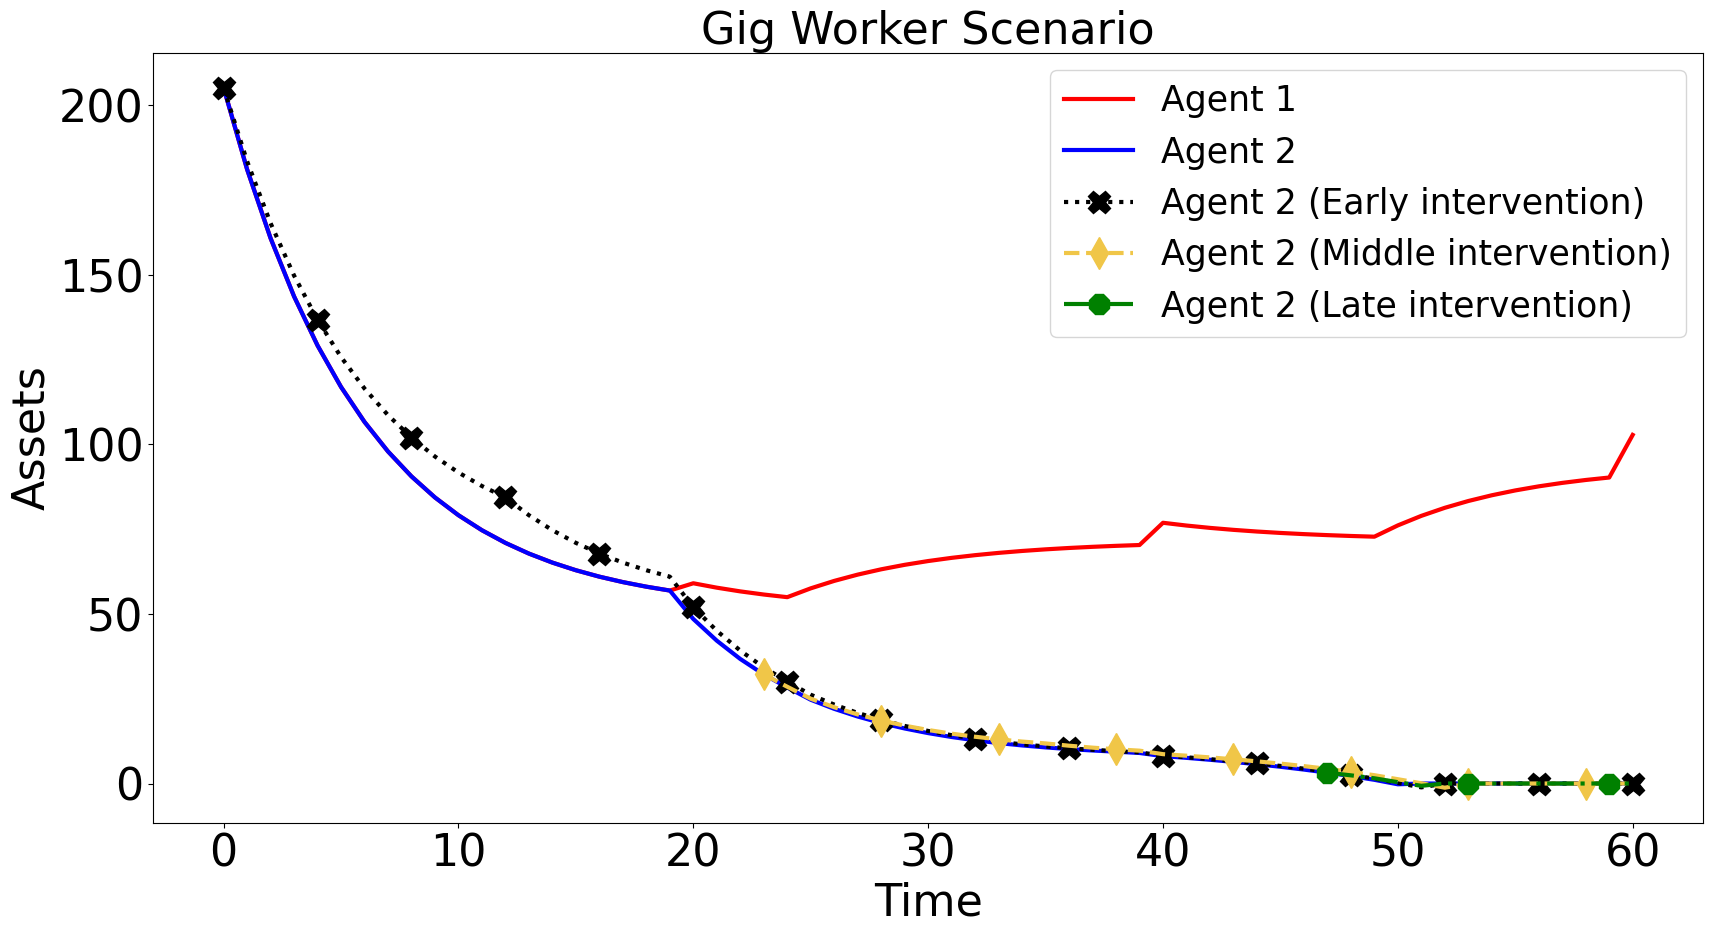

Window size : 10


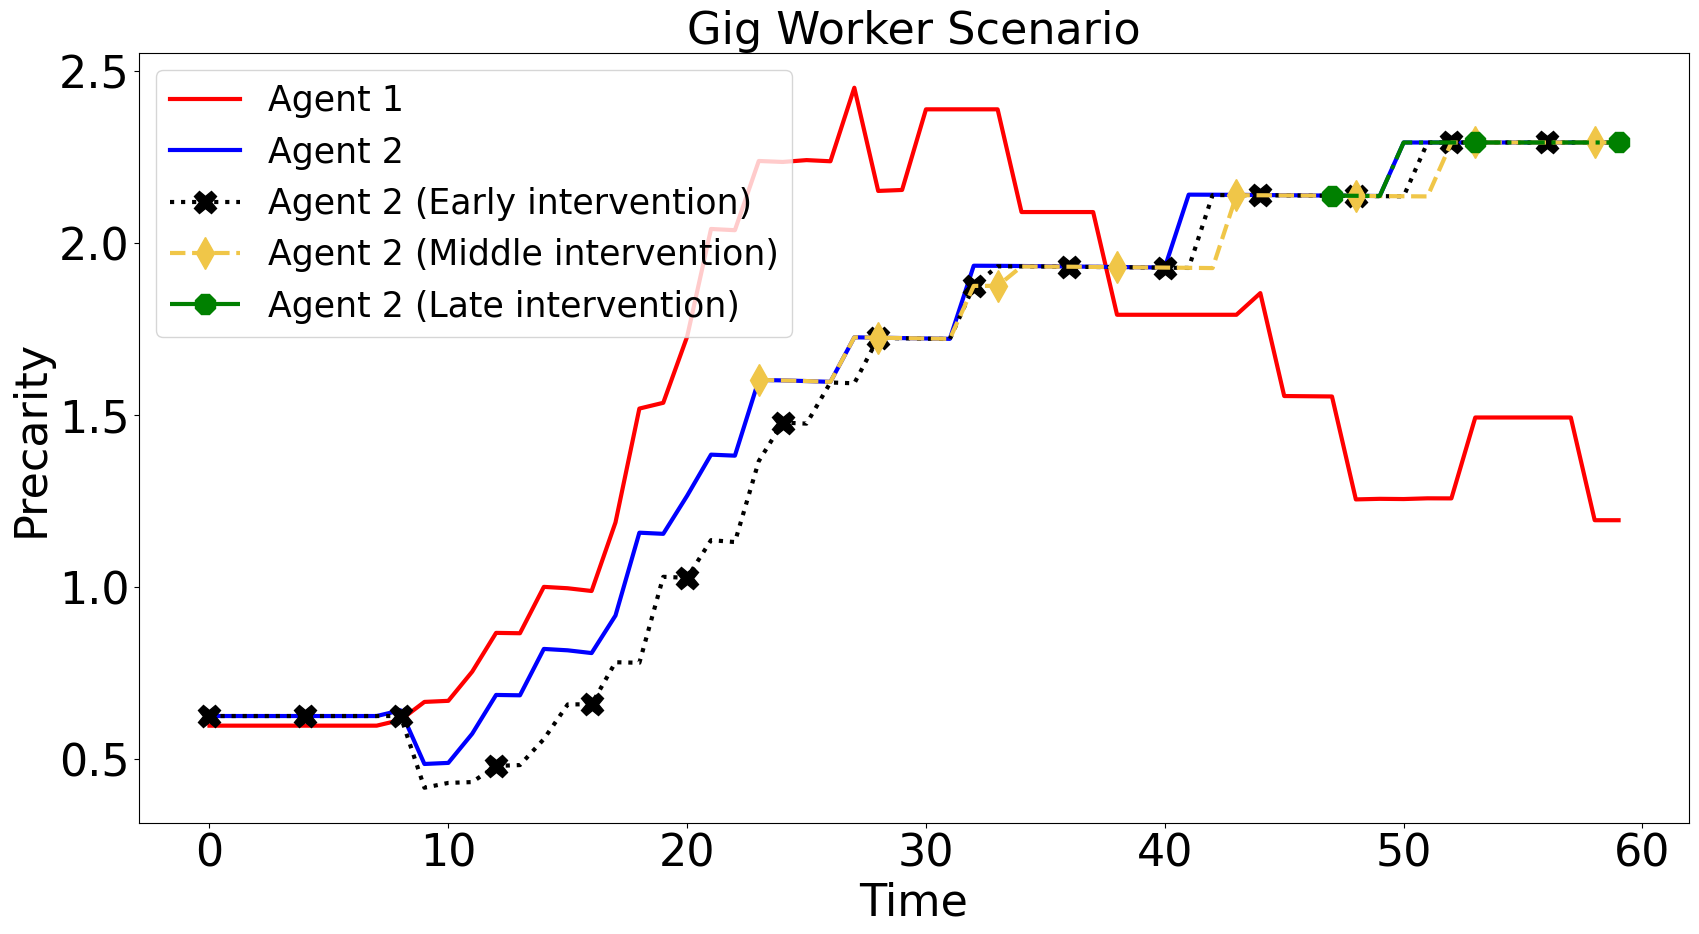

In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''

a_1, inc_1 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_1, income_distribution = income_distribution_1, clf_info= clf_info)
a_2, inc_2 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info)


interventions = {1: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
a_3, inc_3 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

interventions = {24: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
a_4, inc_4 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)


interventions = {48: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
a_5, inc_5 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)


plt.figure(1, figsize=(20, 10))
idxs_1 = [i for i in range(len(a_1))]
idxs_2 = [i for i in range(len(a_2))]
idxs_3 = [i for i in range(len(a_3))]
idxs_4 = [i for i in range(len(a_4))]
idxs_5 = [i for i in range(len(a_5))]

plt.plot(idxs_1,a_1,markevery=1,label="Agent 1",linewidth=3, color='red')#,width=0.4, align='edge')
plt.plot(idxs_2,a_2,markevery=1,label="Agent 2",linewidth=3, color='blue')
plt.plot(idxs_3,a_3,markevery=4, markersize=16,marker="X",label="Agent 2 (Early intervention)",linewidth=3, color='black', linestyle='dotted')
plt.plot(idxs_4[23:],a_4[23:],markevery=5, markersize=16,marker="d",label="Agent 2 (Middle intervention)",linewidth=3, color='#f0c648', linestyle='dashed')
plt.plot(idxs_5[47:],a_5[47:],markevery=6, markersize=16,marker="8",label="Agent 2 (Late intervention)",linewidth=3, color='green', linestyle='dashdot')

plt.legend(loc="upper right")
plt.ylabel('Assets')
plt.xlabel('Time')
plt.title('Gig Worker Scenario')
plt.show()

'''Generating asset levels based on the real sequence'''
a_mean = np.array([a_1,a_2])
a_  = np.unique(a_mean)
assets_lvls = [np.percentile(a_,10*(i+1)) for i in range(10)]
asset_states = [i for i in range(10)]
a_1_seq = get_sequence(a_1,assets_lvls,asset_states)
a_2_seq = get_sequence(a_2,assets_lvls,asset_states)
a_3_seq = get_sequence(a_3,assets_lvls,asset_states)
a_4_seq = get_sequence(a_4,assets_lvls,asset_states)
a_5_seq = get_sequence(a_5,assets_lvls,asset_states)

'''Setting initial precarity states'''
delta = 1
init_prec_state_1 = min(np.array(get_sequence(np.array([init_saving_1]),assets_lvls,asset_states))[0]+delta,asset_states[-1])
init_prec_state_2 = max(np.array(get_sequence(np.array([init_saving_2]),assets_lvls,asset_states))[0]-delta,asset_states[0])

windows = [10]
ws = 10
print("Window size : %d" % (ws))

'''Calculating precarity'''
precarity_1 = []
for i in range(1,len(a_1)):
    weights_savings = generateWeight(a_1_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_1.append(precarityQuantification(a_1_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_1,windowSize=ws,useInit = True, useIncome = True, income = init_income1))

precarity_2 = []
for i in range(1,len(a_2)):
    weights_savings = generateWeight(a_2_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_2.append(precarityQuantification(a_2_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_3 = []
for i in range(1,len(a_3)):
    weights_savings = generateWeight(a_3_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_3.append(precarityQuantification(a_3_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_4 = []
for i in range(1,len(a_4)):
    weights_savings = generateWeight(a_4_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_4.append(precarityQuantification(a_4_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

precarity_5 = []
for i in range(1,len(a_5)):
    weights_savings = generateWeight(a_5_seq[:i+1], values = assets_lvls, states = asset_states)
    precarity_5.append(precarityQuantification(a_5_seq[:i+1], asset_states, weights_savings, 0.2, 1, 1.2, init_prec_state_2,windowSize=ws,useInit = True, useIncome = True, income = init_income))

d_3 = np.subtract(a_3,a_2)
d_4 = np.subtract(a_4,a_2)
d_5 = np.subtract(a_5,a_2)

plt.figure(2, figsize=(20, 10))

idxs_1 = [i for i in range(len(precarity_1))]
idxs_2 = [i for i in range(len(precarity_2))]
idxs_3 = [i for i in range(len(precarity_3))]
idxs_4 = [i for i in range(len(precarity_4))]
idxs_5 = [i for i in range(len(precarity_5))]

plt.plot(idxs_1,precarity_1,markevery=1,label="Agent 1",linewidth=3, color='red')
plt.plot(idxs_2,precarity_2,markevery=1,label="Agent 2",linewidth=3, color='blue')
plt.plot(idxs_3,precarity_3,markevery=4, markersize=16,marker="X",label="Agent 2 (Early intervention)",linewidth=3, color='black', linestyle='dotted')
plt.plot(idxs_4[23:],precarity_4[23:],markevery=5, markersize=16,marker="d",label="Agent 2 (Middle intervention)",linewidth=3, color='#f0c648', linestyle='dashed')
plt.plot(idxs_5[47:],precarity_5[47:],markevery=6, markersize=16,marker="8",label="Agent 2 (Late intervention)",linewidth=3, color='green', linestyle='dashdot')


plt.legend(loc="upper left")
plt.ylabel('Precarity')
plt.xlabel('Time')
plt.title('Gig Worker Scenario')
plt.show()

## Population plots with ML decision maker

Window size : 10


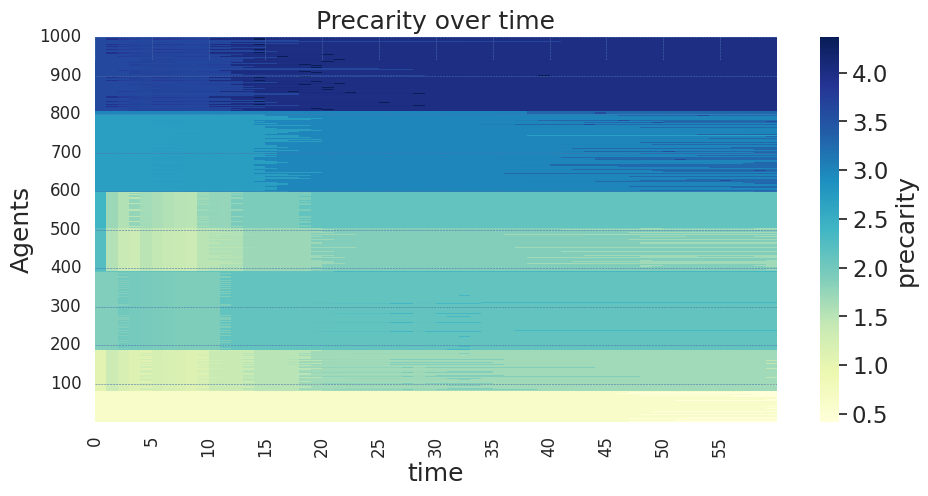

In [ ]:
''' Population heat map showing the precarity of a sample population over time '''
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set(font_scale=1.5)
np.random.seed(exp_seed)
random.seed(exp_seed)
T = 60
st = 0
pop_sze = 1000
income_sample = np.random.choice(incomes,pop_sze,False) #Sample 100 Agents
m = len(income_sample)
a_ = []
# For each Agent calculate the assets
for j in range(m):
      init_income = income_sample[j]
      init_saving = get_savings(init_income)
      init_state = getState([init_saving])[0]
      st = getIncomeClass(init_income)
      a, inc = compute_asset_series_static_clf(con_model, a_star, σ_star, init_state, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6)
      a_.append(a)
a_ = np.array(a_)
ws = 10 #Set window size to 10
print("Window size : %d" % (ws))

#Calculate precarity for each Agent
prec_ = []
for j in range(m):
  a = a_[j]
  precarity = []
  for i in range(1,len(a)):
    weights_savings = generateWeight(getState(a[:i+1]), values = savings_values, states = [0, 1, 2, 3, 4, 5, 6,7,8,9, 10])
    precarity.append(precarityQuantification(getState(a[:i+1]), [0,1,2,3,4,5,6,7,8,9, 10], weights_savings, 0.2, 1, 1.2, 11-init_state,windowSize = ws, useIncome = True, income = income_sample[j]))
  prec_.append(precarity)
prec_ = np.array(prec_)
prec_ = prec_[prec_[:, 0].argsort()] #Sort people by initial precarity
#Plot the heatmap
fig, ax = plt.subplots()
xticklabels = list(range(0, T, 5))
yticklabels = list(range(0, pop_sze, (int)(pop_sze/10)))
xticks = []
yticks = []
for label in xticklabels:
  idx_pos = label
  xticks.append(label)
for label in yticklabels:
  idx_pos = label
  yticks.append(label)
yticklabels = [pop_sze - i for i in yticklabels]
ax = sns.heatmap(np.flip(prec_, axis=0),cmap="YlGnBu",xticklabels=True,yticklabels=True,annot_kws={'fontsize': 24,'fontweight': 'bold','fontfamily': 'serif'},cbar_kws={'label': 'precarity'})
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.vlines(ax.get_xticks(),0,T, linestyle='dashed', linewidth=0.4)
ax.hlines(ax.get_yticks(),0,pop_sze, linestyle='dashed', linewidth=0.4)
ax.set_xticklabels(xticklabels, fontsize = 12)
ax.set_yticklabels(yticklabels, rotation = 0, fontsize = 12)
#ax.vlines(ax.get_xticks(),0,T, linestyle='dashed', linewidth=0.4)
#ax.hlines(ax.get_yticks(),0,pop_sze, linestyle='dashed', linewidth=0.4)
ax.set(ylabel='Agents')
ax.set(xlabel='time')
ax.set_title('Precarity over time')
plt.show()

# Interventions over Multiple Individuals

In [ ]:
num_agnt = 50
epsilon_0 = 0.1

## Minor Income Difference Scenario

### Creating a decision maker

In [ ]:
np.random.seed(exp_seed)
def getLabel(income):
  if(income <= 25000/12000):
    return 0#bernoulli.rvs(0.55-0.25)
  elif(income<= 50000/12000):
    return bernoulli.rvs(0.67-0.25)
  elif(income<= 100000/12000):
    return bernoulli.rvs(0.85-0.25)
  else:
    return 1#bernoulli.rvs(0.96-0.25)

def generateData(incomes, sample_size):
  income_sample = np.random.choice(incomes,sample_size,False)
  savings_sample = np.array([get_savings(income) for income in income_sample])
  label_sample = np.array([getLabel(income) for income in income_sample])
  features = np.array([savings_sample, income_sample]).T
  return features, label_sample.T

def getClassifier(features, labels):
  # model_1 = LogisticRegression()
  # model_2 = GradientBoostingClassifier()
  # model_3 = XGBClassifier()
  # model_4 = RandomForestClassifier()
  # the final model using voting
  # clf = VotingClassifier(estimators=[('lr', model_1), ('xgb', model_2)], voting='soft')

  clf = GradientBoostingClassifier()




  # training all the model on the train dataset
  # clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))
  clf.fit(features, labels)
  return clf

def getClassifierLogistic(features, labels):
  logreg_clf = LogisticRegression()
  logreg_clf.fit(features, labels)
  return logreg_clf

In [ ]:
features, labels = generateData(incomes, 10000)
clf_real = getClassifier(features, labels)
clf_logistic = getClassifierLogistic(features, labels)

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

clf_cross_gbc = cross_validate(GradientBoostingClassifier(), features, labels, cv=kf)
print (clf_cross_gbc)

clf_cross_lgr = cross_validate(LogisticRegression(), features, labels, cv=kf)
print (clf_cross_lgr)





print ("=======cv score summaries for various classifiers=======")
scores = cross_val_score(AdaBoostClassifier(), features, labels, cv = kf)


print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



scores = cross_val_score(GradientBoostingClassifier(), features, labels, cv = kf)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


scores = cross_val_score(LogisticRegression(), features, labels, cv = kf)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

{'fit_time': array([0.66955304, 0.63067865, 0.61890888, 0.62161589, 0.59436703,
       0.62576413, 0.61593819, 0.60269475, 0.60960889, 0.59542036]), 'score_time': array([0.00278687, 0.00284934, 0.00276756, 0.00280333, 0.00285673,
       0.00299048, 0.00282598, 0.00273228, 0.00271153, 0.0029366 ]), 'test_score': array([0.796, 0.797, 0.789, 0.778, 0.79 , 0.803, 0.769, 0.804, 0.798,
       0.791])}
{'fit_time': array([0.0401392 , 0.04261732, 0.03723645, 0.03980589, 0.05834651,
       0.05460358, 0.0338676 , 0.0579648 , 0.04042697, 0.03260827]), 'score_time': array([0.00228333, 0.00133133, 0.00131822, 0.00141883, 0.0013144 ,
       0.00144029, 0.00134301, 0.00136137, 0.00133157, 0.00140142]), 'test_score': array([0.782, 0.805, 0.791, 0.787, 0.802, 0.76 , 0.782, 0.787, 0.807,
       0.78 ])}
=======cv score summaries for various classifiers=======
Cross Validation Scores:  [0.813 0.807 0.79  0.789 0.784 0.792 0.804 0.784 0.781 0.797]
Average CV Score:  0.7941
Number of CV Scores used in Ave

In [ ]:
def getDecisionBoundary(clf):
  w = clf.coef_[0]
  b = -1*clf.intercept_[0]/w[1]
  m = -1*w[0]/w[1]
  return m,b

def getIncome(clf,savings,epsilon = 0.1):
  m,b = getDecisionBoundary(clf)
  income = m*savings+b
  return (1+epsilon)*income

### Getting the consumption

In [ ]:
''' Compute assets when the income changes at intervals based on temporary and permanent shocks.
There is a decision maker and depnding on where the Agent is compared to the decision maker,
a shock could be either positive or negative.'''
def compute_asset_series_static_clf(con_model, a_star, σ_star, z_init, clf, initincome=0, T=500_000, init_a = 0, permanenet_shock_gap = 500_000, temporary_shock_gap = 500_000, permanenet_shock = 0, temporary_shock = 0):
    # Create consumption function by linear interpolation
    σ = lambda a, z : interp(a_star[:, z], σ_star[:, z], a)
    t_s = []
    # Simulate the asset path
    a = np.zeros(T+1)
    a[0] = init_a
    y_val = [initincome]
    current_income = initincome
    lbls = []
    for t in range(T):
        label = clf.predict(np.array([[a[t],current_income]]))[0]
        lbls.append(label)
        if (((t+1)%permanenet_shock_gap == 0) and label == 0):
          current_income *= (1-permanenet_shock) #permanent shocks with negative decisions
        elif (((t+1)%permanenet_shock_gap == 0) and label == 1):
          current_income *= (1+permanenet_shock) #permanent shocks with positive decisions
        y_tmp = current_income
        if (((t+1)%temporary_shock_gap == 0) and label == 0):
          current_income *= (1-temporary_shock) #temporary shocks with negative decisions
        elif (((t+1)%temporary_shock_gap== 0) and label == 1):
          current_income *= (1+temporary_shock) #temporary shocks with positive decisions
        R = con_model.R()
        z = getIncomeState(current_income)
        s = a[t] - max(σ(a[t], z),basic_expenditure(y_tmp)) #Calculating the consumption and consuming the maximum of it or the basic needs
        a[t+1] = R * (s) + current_income
        y_val.append(current_income)
        if ((t+1)%temporary_shock_gap == 0):
          current_income = y_tmp
        if(a[t+1]<=0): #Make sure we don't keep going bankrupt
          break
    return a, y_val

### Running Experiments: Minor Income Difference Scenario

#### Defining a classifier and picking two closest Agents

In [ ]:
np.random.seed(exp_seed)
features, labels = generateData(incomes, 10000)
clf_real = getClassifier(features, labels)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
np.random.seed(exp_seed)
data_lst = []
for i in range(num_agnt):
  features, labels = generateData(incomes, 100)
  data_lst.append((features, labels))

best_pairs = []
for j in range(num_agnt):
  features, labels = data_lst[j]
  predictions = clf_real.predict(features)
  predictions_0 = []
  predictions_1 = []
  for i in range(len(predictions)):
    if(predictions[i]==1):
      predictions_1.append(features[i])
    else:
      predictions_0.append(features[i])

  best_pair = None
  best_dissimilarity = float('inf')
  for p0 in predictions_0:
    for p1 in predictions_1:
      dissimilarity = pairwise_distances([np.array(p0)],[np.array(p1)], metric = "l2")[0]
      if(dissimilarity<best_dissimilarity):
        best_pair = (p0,p1)
        best_dissimilarity = dissimilarity
  best_pairs.append(best_pair)

#### Introducing Interventions

In [ ]:
''' Compute assets when the income changes at intervals based on temporary and permanent shocks.
There is a decision maker and depnding on where the Agent is compared to the decision maker,
a shock could be either positive or negative.'''
def compute_asset_series_static_clf_interventions(con_model,
                                                  a_star,
                                                  σ_star,
                                                  z_init,
                                                  clf,
                                                  initincome=0,
                                                  T=500,
                                                  init_a = 0,
                                                  permanenet_shock_gap = 500,
                                                  temporary_shock_gap = 500,
                                                  permanenet_shock = 0,
                                                  temporary_shock = 0,
                                                  interventions ={}):

    #Identifying different types of interventions
    one_shot_interventions = {}
    temporal_interventions = {}
    for key in interventions:
      if(interventions[key]['type'] == 'one_shot'):
        one_shot_interventions[key] = interventions[key]['value']
      else:
        t = interventions[key]['duration']
        for i in range(t):
          temporal_interventions[key+i] = interventions[key]['rate_function']
    # Create consumption function by linear interpolation
    σ = lambda a, z : interp(a_star[:, z], σ_star[:, z], a)
    t_s = []

    # Simulate the asset path
    a = np.zeros(T+1)
    a[0] = init_a
    y_val = [initincome]
    current_income = initincome
    for t in range(T):
        label = clf.predict(np.array([[a[t],current_income]]))[0]
        #permanent shocks with negative decisions
        if ((t+1)%permanenet_shock_gap == 0 and label == 0):
          current_income *= (1-permanenet_shock)
        #permanent shocks with positive decisions
        elif ((t+1)%permanenet_shock_gap == 0 and label == 1):
          current_income *= (1+permanenet_shock)
        #saving current context
        y_tmp = current_income
        #temporary shocks with negative decisions
        if ((t+1)%temporary_shock_gap == 0 and label == 0):
          current_income *= (1-temporary_shock)
        #temporary shocks with positive decisions
        elif ((t+1)%temporary_shock_gap== 0 and label == 1):
          current_income *= (1+temporary_shock)
        ctmp = y_tmp

        #Handling interventions
        if((t+1) in one_shot_interventions):
          current_income += one_shot_interventions[t+1]
        if((t+1) in temporal_interventions):
          current_income *= temporal_interventions[t+1](current_income)

        #Calculating the consumption and consuming the maximum of it or the basic needs
        R = con_model.R()
        z = getIncomeState(current_income)
        s = a[t] - max(σ(a[t], z),basic_expenditure(y_tmp))
        a[t+1] = R * (s) + current_income
        y_val.append(current_income)
        if ((t+1)%temporary_shock_gap == 0):
          current_income = y_tmp
        current_income = y_tmp

        #Break at the point of ruin
        if(a[t+1]<=0):
          break
    return a, y_val

In [ ]:
# Come up with different functions rooted on tax information
def intervention_function(income):
  if(income<=9.700/12):
    return 1/(1-0.1)
  elif(income<=39.475/12):
    return 1/(1-0.12)
  elif(income<=84.200/12):
    return 1/(1-0.22)
  elif(income<=160.725/12):
    return 1/(1-0.24)
  elif(income<=204.100/12):
    return 1/(1-0.32)
  elif(income<=510.300/12):
    return 1/(1-0.35)
  else:
    return 1/(1-0.37)

#### Tax Incentives

In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''
epsilon = epsilon_0
times = []
gain = []
for best_pair in best_pairs:
  init_income = best_pair[1][1]
  init_saving = best_pair[1][0]
  init_state_1 = getState([init_saving])[0]
  a_1, inc_1 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_1, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6)
  init_saving_1 = init_saving
  init_income1=init_income

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {}
  a_2, inc_2 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {1: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
  a_3, inc_3 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {24: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
  a_4, inc_4 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {48: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
  a_5, inc_5 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  d_3 = np.subtract(a_3,a_2)
  d_4 = np.subtract(a_4,a_2)
  d_5 = np.subtract(a_5,a_2)

  more_3 = (d_3 > epsilon ).sum()
  more_4 = (d_4 > epsilon ).sum()
  more_5 = (d_5 > epsilon ).sum()

  area_3 = np.trapz(d_3, dx=1)
  area_4 = np.trapz(d_4, dx=1)
  area_5 = np.trapz(d_5, dx=1)

  m = np.array([[more_3, more_4, more_5], [area_3, area_4, area_5]])
  times.append([more_3, more_4, more_5])
  gain.append([area_3, area_4, area_5])

headers = ["Early", "Middle", "Late"]

print("Mean values of the afloat times:")
mean_time = np.mean(np.array(times),axis = 0)
time_stat = np.array([mean_time])
table = tabulate(time_stat, headers, tablefmt="fancy_grid")
print(table)

print("Mean values of the afloat gain:")
mean_gain = np.mean(np.array(gain),axis = 0)
gain_stat = np.array([mean_gain])
table = tabulate(gain_stat, headers, tablefmt="fancy_grid")
print(table)

Mean values of the afloat times:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│   33.38 │    33.12 │  11.06 │
╘═════════╧══════════╧════════╛
Mean values of the afloat gain:
╒═════════╤══════════╤═════════╕
│   Early │   Middle │    Late │
╞═════════╪══════════╪═════════╡
│ 63.7561 │  39.3398 │ 18.4088 │
╘═════════╧══════════╧═════════╛


In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''
epsilon = epsilon_0
times = []
gain = []
for best_pair in best_pairs:
  init_income = best_pair[1][1]
  init_saving = best_pair[1][0]
  init_state_1 = getState([init_saving])[0]
  a_1, inc_1 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_1, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6)
  init_saving_1 = init_saving
  init_income1=init_income

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {}
  a_2, inc_2 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {1: {'type':'temporal', 'rate_function': intervention_function, 'duration': 6}}
  a_3, inc_3 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {24: {'type':'temporal', 'rate_function': intervention_function, 'duration': 6}}
  a_4, inc_4 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {48: {'type':'temporal', 'rate_function': intervention_function, 'duration': 6}}
  a_5, inc_5 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  d_3 = np.subtract(a_3,a_2)
  d_4 = np.subtract(a_4,a_2)
  d_5 = np.subtract(a_5,a_2)

  more_3 = (d_3 > epsilon ).sum()
  more_4 = (d_4 > epsilon ).sum()
  more_5 = (d_5 > epsilon ).sum()

  area_3 = np.trapz(d_3, dx=1)
  area_4 = np.trapz(d_4, dx=1)
  area_5 = np.trapz(d_5, dx=1)

  m = np.array([[more_3, more_4, more_5], [area_3, area_4, area_5]])
  times.append([more_3, more_4, more_5])
  gain.append([area_3, area_4, area_5])


headers = ["Early", "Middle", "Late"]

print("Mean values of the afloat times:")
mean_time = np.mean(np.array(times),axis = 0)
time_stat = np.array([mean_time])
table = tabulate(time_stat, headers, tablefmt="fancy_grid")
print(table)

print("Mean values of the afloat gain:")
mean_gain = np.mean(np.array(gain),axis = 0)
gain_stat = np.array([mean_gain])
table = tabulate(gain_stat, headers, tablefmt="fancy_grid")
print(table)

Mean values of the afloat times:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│   24.82 │    25.18 │     11 │
╘═════════╧══════════╧════════╛
Mean values of the afloat gain:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│ 31.7367 │  20.4985 │ 12.592 │
╘═════════╧══════════╧════════╛


#### Direct Subsidies

In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''
epsilon = epsilon_0
times = []
gain = []
for best_pair in best_pairs:
  init_income = best_pair[1][1]
  init_saving = best_pair[1][0]
  init_state_1 = getState([init_saving])[0]
  a_1, inc_1 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_1, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6)
  init_saving_1 = init_saving
  init_income1=init_income

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {}
  a_2, inc_2 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {12: {'type':'one_shot', 'value': 3},24: {'type':'one_shot', 'value': 3},36: {'type':'one_shot', 'value': 3}}
  a_3, inc_3 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {24: {'type':'one_shot', 'value': 3},36: {'type':'one_shot', 'value': 3},48: {'type':'one_shot', 'value': 3}}
  a_4, inc_4 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {36: {'type':'one_shot', 'value': 3},48: {'type':'one_shot', 'value': 3},60: {'type':'one_shot', 'value': 3}}
  a_5, inc_5 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  d_3 = np.subtract(a_3,a_2)
  d_4 = np.subtract(a_4,a_2)
  d_5 = np.subtract(a_5,a_2)

  more_3 = (d_3 > epsilon ).sum()
  more_4 = (d_4 > epsilon ).sum()
  more_5 = (d_5 > epsilon ).sum()

  area_3 = np.trapz(d_3, dx=1)
  area_4 = np.trapz(d_4, dx=1)
  area_5 = np.trapz(d_5, dx=1)

  m = np.array([[more_3, more_4, more_5], [area_3, area_4, area_5]])
  times.append([more_3, more_4, more_5])
  gain.append([area_3, area_4, area_5])

headers = ["Early", "Middle", "Late"]

print("Mean values of the afloat times:")
mean_time = np.mean(np.array(times),axis = 0)
time_stat = np.array([mean_time])
table = tabulate(time_stat, headers, tablefmt="fancy_grid")
print(table)

print("Mean values of the afloat gain:")
mean_gain = np.mean(np.array(gain),axis = 0)
gain_stat = np.array([mean_gain])
table = tabulate(gain_stat, headers, tablefmt="fancy_grid")
print(table)

Mean values of the afloat times:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│   46.08 │    35.48 │  23.28 │
╘═════════╧══════════╧════════╛
Mean values of the afloat gain:
╒═════════╤══════════╤═════════╕
│   Early │   Middle │    Late │
╞═════════╪══════════╪═════════╡
│ 47.4411 │   46.432 │ 31.3553 │
╘═════════╧══════════╧═════════╛


In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''
epsilon = epsilon_0
times = []
gain = []
for best_pair in best_pairs:
  init_income = best_pair[1][1]
  init_saving = best_pair[1][0]
  init_state_1 = getState([init_saving])[0]
  a_1, inc_1 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_1, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6)
  init_saving_1 = init_saving
  init_income1=init_income

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {}
  a_2, inc_2 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {12: {'type':'one_shot', 'value': 0.6},24: {'type':'one_shot', 'value': 0.6},36: {'type':'one_shot', 'value': 0.6}}
  a_3, inc_3 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {24: {'type':'one_shot', 'value': 0.6},36: {'type':'one_shot', 'value': 0.6},48: {'type':'one_shot', 'value': 0.6}}
  a_4, inc_4 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  init_income = best_pair[0][1]
  init_saving = best_pair[0][0]
  init_state_2 = getState([init_saving])[0]
  interventions = {36: {'type':'one_shot', 'value': 0.6},48: {'type':'one_shot', 'value': 0.6},60: {'type':'one_shot', 'value': 0.6}}
  a_5, inc_5 = compute_asset_series_static_clf_interventions(con_model, a_star, σ_star, init_state_2, clf_real, initincome=init_income, T=T, init_a = init_saving, permanenet_shock_gap = 25, temporary_shock_gap = 20, permanenet_shock = 0.4, temporary_shock = 0.6, interventions = interventions)
  init_saving_2 = init_saving

  d_3 = np.subtract(a_3,a_2)
  d_4 = np.subtract(a_4,a_2)
  d_5 = np.subtract(a_5,a_2)

  more_3 = (d_3 > epsilon ).sum()
  more_4 = (d_4 > epsilon ).sum()
  more_5 = (d_5 > epsilon ).sum()

  area_3 = np.trapz(d_3, dx=1)
  area_4 = np.trapz(d_4, dx=1)
  area_5 = np.trapz(d_5, dx=1)

  m = np.array([[more_3, more_4, more_5], [area_3, area_4, area_5]])
  times.append([more_3, more_4, more_5])
  gain.append([area_3, area_4, area_5])

headers = ["Early", "Middle", "Late"]

print("Mean values of the afloat times:")
mean_time = np.mean(np.array(times),axis = 0)
time_stat = np.array([mean_time])
table = tabulate(time_stat, headers, tablefmt="fancy_grid")
print(table)

print("Mean values of the afloat gain:")
mean_gain = np.mean(np.array(gain),axis = 0)
gain_stat = np.array([mean_gain])
table = tabulate(gain_stat, headers, tablefmt="fancy_grid")
print(table)

Mean values of the afloat times:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│   28.36 │    28.42 │  20.64 │
╘═════════╧══════════╧════════╛
Mean values of the afloat gain:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│ 8.87535 │  10.2109 │ 8.0928 │
╘═════════╧══════════╧════════╛


## Gig worker vs. Office worker Scenario

### Different income distributions method

In [ ]:
''' Compute assets when the income changes at specified points with specified shocks (type and size).
There is no real decision maker unless we add a decision maker as well.'''
def compute_asset_series_income_distribution(con_model,
                                             a_star,
                                             σ_star,
                                             initincome=0,
                                             T=500_000,
                                             init_a = 0,
                                             income_distribution = {},
                                             clf_info={'function':None, 'perm_gap': 100, 'perm_shock': 0, 'temp_gap': 100, 'temp_shock': 0}
                                             ,interventions={}):
    # Create consumption function by linear interpolation

    #Identifying different types of interventions
    one_shot_interventions = {}
    temporal_interventions = {}
    for key in interventions:
      if(interventions[key]['type'] == 'one_shot'):
        one_shot_interventions[key] = interventions[key]['value']
      else:
        t = interventions[key]['duration']
        for i in range(t):
          temporal_interventions[key+i] = interventions[key]['rate_function']
    σ = lambda a, z : interp(a_star[:, z], σ_star[:, z], a)
    t_s = []
    # Simulate the asset path
    a = np.zeros(T+1)
    a[0] = init_a
    y_val = [initincome]
    current_income = initincome
    for t in range(T):
        rp = 1
        rt = 1
        if((t+1) in income_distribution):
          current_income = income_distribution[t+1]
        #clf_info={'function':None, 'perm_gap': 100, 'perm_shock': 0, 'temp_gap': 100, 'temp_shock': 0}
        y_tmp = current_income
        if(clf_info['function']!=None):
          label = clf_info['function'].predict(np.array([[a[t],current_income]]))[0]
          if (((t+1)%clf_info['perm_gap'] == 0) and label == 0):
            current_income *= (1-clf_info['perm_shock']) #permanent shocks with negative decisions
          elif (((t+1)%clf_info['perm_gap'] == 0) and label == 1):
            current_income *= (1+clf_info['perm_shock']) #permanent shocks with positive decisions
            y_tmp = current_income
          if (((t+1)%clf_info['temp_gap'] == 0) and label == 0):
            current_income *= (1-clf_info['temp_shock']) #temporary shocks with negative decisions
          elif (((t+1)%clf_info['temp_gap']== 0) and label == 1):
            current_income *= (1+clf_info['temp_shock']) #temporary sho
        #Handling interventions
        if((t+1) in one_shot_interventions):
          current_income += one_shot_interventions[t+1]
        if((t+1) in temporal_interventions):
          current_income *= temporal_interventions[t+1](current_income)
        R = con_model.R()
        z = getIncomeState(current_income)
        s = a[t] - max(σ(a[t], z),basic_expenditure(current_income)) #Calculating the consumption and consuming the maximum of it or the basic needs
        a[t+1] = R * (s) + current_income
        y_val.append(current_income)
        current_income = y_tmp
        if(a[t+1]<=0): #Make sure we don't keep going bankrupt
          break
    return a, y_val

In [ ]:
inc_30 = (np.percentile(incomes, 30))
inc_80 = (np.percentile(incomes, 80))
low = []
high = []
mid = []
for i in incomes:
  if(i<=inc_30):
    low.append(i)
  elif(i>=inc_80):
    high.append(i)
  else:
    mid.append(i)
low = np.array(low)
high = np.array(high)
mid = np.array(mid)

def generateIncomeDistributionList(time_slots):
  incomes_dict = {}
  for t in time_slots:
    incomes_dict[t] = np.random.choice(np.array(low))
  return incomes_dict

### Running experiments: Gig worker vs. Office worker Scenario

#### Incoporating classifier

In [ ]:
''' Two Agents with different precarity and different shocks '''
T = 60
np.random.seed(exp_seed)
individuals = []
for i in range(num_agnt):
  init_income = np.random.choice(np.array(mid))
  init_saving_1 = get_savings(init_income)
  init_saving_2 = get_savings(init_income)
  init_state_1 = getState([init_saving_1])[0]
  init_state_2 = getState([init_saving_2])[0]
  income_distribution_1 = generateIncomeDistributionList([])
  income_distribution_2 = generateIncomeDistributionList([20])
  individuals.append([init_income,init_saving_1,init_saving_2,init_state_1,init_state_2,income_distribution_1,income_distribution_2])

clf_info={'function':clf_real, 'perm_gap': 25, 'perm_shock': 0.4, 'temp_gap': 20, 'temp_shock': 0.6}

##### Direct Subsidies

In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''
epsilon = epsilon_0
times = []
gain = []
for agent in individuals:
  init_income = agent[0]
  init_saving_1 = agent[1]
  init_saving_2 = agent[2]
  init_state_1 = agent[3]
  init_state_2 = agent[4]
  income_distribution_1 = agent[5]
  income_distribution_2 = agent[6]
  a_1, inc_1 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_1, income_distribution = income_distribution_1, clf_info= clf_info)
  a_2, inc_2 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info)


  interventions = {12: {'type':'one_shot', 'value': 3},24: {'type':'one_shot', 'value': 3},36: {'type':'one_shot', 'value': 3}}
  a_3, inc_3 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

  interventions = {24: {'type':'one_shot', 'value': 3},36: {'type':'one_shot', 'value': 3},48: {'type':'one_shot', 'value': 3}}
  a_4, inc_4 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)


  interventions = {36: {'type':'one_shot', 'value': 3},48: {'type':'one_shot', 'value': 3},60: {'type':'one_shot', 'value': 3}}
  a_5, inc_5 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

  d_3 = np.subtract(a_3,a_2)
  d_4 = np.subtract(a_4,a_2)
  d_5 = np.subtract(a_5,a_2)

  more_3 = (d_3 > epsilon ).sum()
  more_4 = (d_4 > epsilon ).sum()
  more_5 = (d_5 > epsilon ).sum()

  area_3 = np.trapz(d_3, dx=1)
  area_4 = np.trapz(d_4, dx=1)
  area_5 = np.trapz(d_5, dx=1)

  m = np.array([[more_3, more_4, more_5], [area_3, area_4, area_5]])
  times.append([more_3, more_4, more_5])
  gain.append([area_3, area_4, area_5])


headers = ["Early", "Middle", "Late"]

print("Mean values of the afloat times:")
mean_time = np.mean(np.array(times),axis = 0)
time_stat = np.array([mean_time])
table = tabulate(time_stat, headers, tablefmt="fancy_grid")
print(table)

print("Mean values of the afloat gain:")
mean_gain = np.mean(np.array(gain),axis = 0)
gain_stat = np.array([mean_gain])
table = tabulate(gain_stat, headers, tablefmt="fancy_grid")
print(table)

Mean values of the afloat times:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│   36.12 │     25.3 │  12.94 │
╘═════════╧══════════╧════════╛
Mean values of the afloat gain:
╒═════════╤══════════╤═════════╕
│   Early │   Middle │    Late │
╞═════════╪══════════╪═════════╡
│ 53.3407 │  45.3924 │ 24.9969 │
╘═════════╧══════════╧═════════╛


In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''
epsilon = epsilon_0
times = []
gain = []
for agent in individuals:
  init_income = agent[0]
  init_saving_1 = agent[1]
  init_saving_2 = agent[2]
  init_state_1 = agent[3]
  init_state_2 = agent[4]
  income_distribution_1 = agent[5]
  income_distribution_2 = agent[6]
  a_1, inc_1 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_1, income_distribution = income_distribution_1, clf_info= clf_info)
  a_2, inc_2 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info)


  interventions = {12: {'type':'one_shot', 'value': 0.6},24: {'type':'one_shot', 'value': 0.6},36: {'type':'one_shot', 'value': 0.6}}
  a_3, inc_3 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

  interventions = {24: {'type':'one_shot', 'value': 0.6},36: {'type':'one_shot', 'value': 0.6},48: {'type':'one_shot', 'value': 0.6}}
  a_4, inc_4 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)


  interventions = {36: {'type':'one_shot', 'value': 0.6},48: {'type':'one_shot', 'value': 0.6},60: {'type':'one_shot', 'value': 0.6}}
  a_5, inc_5 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

  d_3 = np.subtract(a_3,a_2)
  d_4 = np.subtract(a_4,a_2)
  d_5 = np.subtract(a_5,a_2)

  more_3 = (d_3 > epsilon ).sum()
  more_4 = (d_4 > epsilon ).sum()
  more_5 = (d_5 > epsilon ).sum()

  area_3 = np.trapz(d_3, dx=1)
  area_4 = np.trapz(d_4, dx=1)
  area_5 = np.trapz(d_5, dx=1)

  m = np.array([[more_3, more_4, more_5], [area_3, area_4, area_5]])
  times.append([more_3, more_4, more_5])
  gain.append([area_3, area_4, area_5])


headers = ["Early", "Middle", "Late"]

print("Mean values of the afloat times:")
mean_time = np.mean(np.array(times),axis = 0)
time_stat = np.array([mean_time])
table = tabulate(time_stat, headers, tablefmt="fancy_grid")
print(table)

print("Mean values of the afloat gain:")
mean_gain = np.mean(np.array(gain),axis = 0)
gain_stat = np.array([mean_gain])
table = tabulate(gain_stat, headers, tablefmt="fancy_grid")
print(table)

Mean values of the afloat times:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│   29.42 │     21.8 │  11.06 │
╘═════════╧══════════╧════════╛
Mean values of the afloat gain:
╒═════════╤══════════╤═════════╕
│   Early │   Middle │    Late │
╞═════════╪══════════╪═════════╡
│ 12.3192 │  10.9735 │ 6.48365 │
╘═════════╧══════════╧═════════╛


##### Tax Incentives

In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''
epsilon = epsilon_0
times = []
gain = []
for agent in individuals:
  init_income = agent[0]
  init_saving_1 = agent[1]
  init_saving_2 = agent[2]
  init_state_1 = agent[3]
  init_state_2 = agent[4]
  income_distribution_1 = agent[5]
  income_distribution_2 = agent[6]
  a_1, inc_1 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_1, income_distribution = income_distribution_1, clf_info= clf_info)
  a_2, inc_2 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info)


  interventions = {1: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
  a_3, inc_3 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

  interventions = {24: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
  a_4, inc_4 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)


  interventions = {48: {'type':'temporal', 'rate_function': intervention_function, 'duration': 12}}
  a_5, inc_5 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

  d_3 = np.subtract(a_3,a_2)
  d_4 = np.subtract(a_4,a_2)
  d_5 = np.subtract(a_5,a_2)

  more_3 = (d_3 > epsilon ).sum()
  more_4 = (d_4 > epsilon ).sum()
  more_5 = (d_5 > epsilon ).sum()

  area_3 = np.trapz(d_3, dx=1)
  area_4 = np.trapz(d_4, dx=1)
  area_5 = np.trapz(d_5, dx=1)

  m = np.array([[more_3, more_4, more_5], [area_3, area_4, area_5]])
  times.append([more_3, more_4, more_5])
  gain.append([area_3, area_4, area_5])

headers = ["Early", "Middle", "Late"]

print("Mean values of the afloat times:")
mean_time = np.mean(np.array(times),axis = 0)
time_stat = np.array([mean_time])
table = tabulate(time_stat, headers, tablefmt="fancy_grid")
print(table)

print("Mean values of the afloat gain:")
mean_gain = np.mean(np.array(gain),axis = 0)
gain_stat = np.array([mean_gain])
table = tabulate(gain_stat, headers, tablefmt="fancy_grid")
print(table)

Mean values of the afloat times:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│   41.34 │    19.24 │   4.68 │
╘═════════╧══════════╧════════╛
Mean values of the afloat gain:
╒═════════╤══════════╤═════════╕
│   Early │   Middle │    Late │
╞═════════╪══════════╪═════════╡
│ 109.761 │   19.798 │ 6.64789 │
╘═════════╧══════════╧═════════╛


In [ ]:
''' Two Agents with different precarity and two sides of decision threshold '''
'''Generating assets series'''
epsilon = epsilon_0
times = []
gain = []
for agent in individuals:
  init_income = agent[0]
  init_saving_1 = agent[1]
  init_saving_2 = agent[2]
  init_state_1 = agent[3]
  init_state_2 = agent[4]
  income_distribution_1 = agent[5]
  income_distribution_2 = agent[6]
  a_1, inc_1 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_1, income_distribution = income_distribution_1, clf_info= clf_info)
  a_2, inc_2 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info)


  interventions = {1: {'type':'temporal', 'rate_function': intervention_function, 'duration': 6}}
  a_3, inc_3 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

  interventions = {24: {'type':'temporal', 'rate_function': intervention_function, 'duration': 6}}
  a_4, inc_4 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)


  interventions = {48: {'type':'temporal', 'rate_function': intervention_function, 'duration': 6}}
  a_5, inc_5 = compute_asset_series_income_distribution(con_model, a_star, σ_star, initincome=init_income, T=T, init_a = init_saving_2, income_distribution = income_distribution_2, clf_info= clf_info, interventions = interventions)

  d_3 = np.subtract(a_3,a_2)
  d_4 = np.subtract(a_4,a_2)
  d_5 = np.subtract(a_5,a_2)

  more_3 = (d_3 > epsilon ).sum()
  more_4 = (d_4 > epsilon ).sum()
  more_5 = (d_5 > epsilon ).sum()

  area_3 = np.trapz(d_3, dx=1)
  area_4 = np.trapz(d_4, dx=1)
  area_5 = np.trapz(d_5, dx=1)

  m = np.array([[more_3, more_4, more_5], [area_3, area_4, area_5]])
  times.append([more_3, more_4, more_5])
  gain.append([area_3, area_4, area_5])

headers = ["Early", "Middle", "Late"]

print("Mean values of the afloat times:")
mean_time = np.mean(np.array(times),axis = 0)
time_stat = np.array([mean_time])
table = tabulate(time_stat, headers, tablefmt="fancy_grid")
print(table)

print("Mean values of the afloat gain:")
mean_gain = np.mean(np.array(gain),axis = 0)
gain_stat = np.array([mean_gain])
table = tabulate(gain_stat, headers, tablefmt="fancy_grid")
print(table)

Mean values of the afloat times:
╒═════════╤══════════╤════════╕
│   Early │   Middle │   Late │
╞═════════╪══════════╪════════╡
│    33.6 │    16.84 │   4.58 │
╘═════════╧══════════╧════════╛
Mean values of the afloat gain:
╒═════════╤══════════╤═════════╕
│   Early │   Middle │    Late │
╞═════════╪══════════╪═════════╡
│ 54.4484 │  8.79599 │ 4.67695 │
╘═════════╧══════════╧═════════╛
